In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edges data
edges_file = 'email-Eu-core.txt'
edges_df = pd.read_csv(edges_file, sep=' ', header=None, names=['node_1', 'node_2'])

# Load the labels data
labels_file = 'email-Eu-core-department-labels.txt'
labels_df = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])

# Display the first few rows of each DataFrame
print("Edges DataFrame:")
print(edges_df.head())

print("\nLabels DataFrame:")
print(labels_df.head())


Edges DataFrame:
   node_1  node_2
0       0       1
1       2       3
2       2       4
3       5       6
4       5       7

Labels DataFrame:
   node  department
0     0           1
1     1           1
2     2          21
3     3          21
4     4          21


In [2]:
# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Check basic properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 1005
Number of edges: 16706


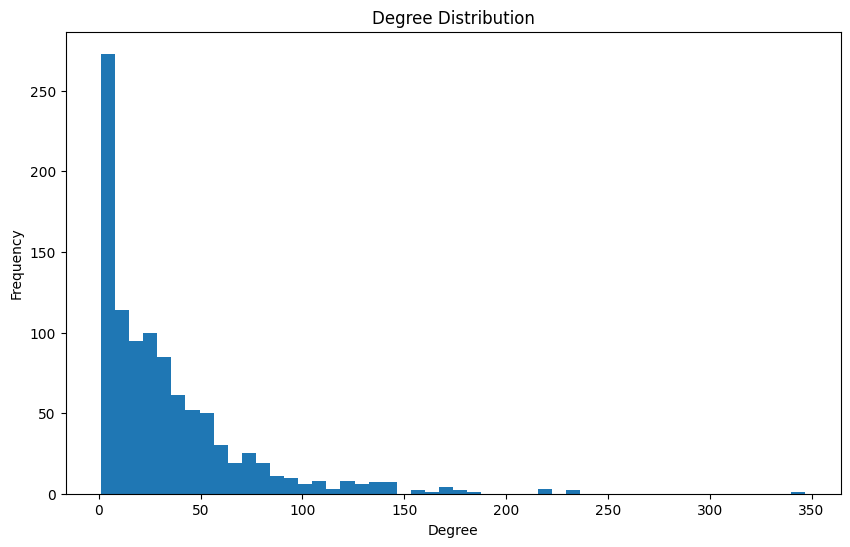

In [3]:
# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


Missing labels: 0


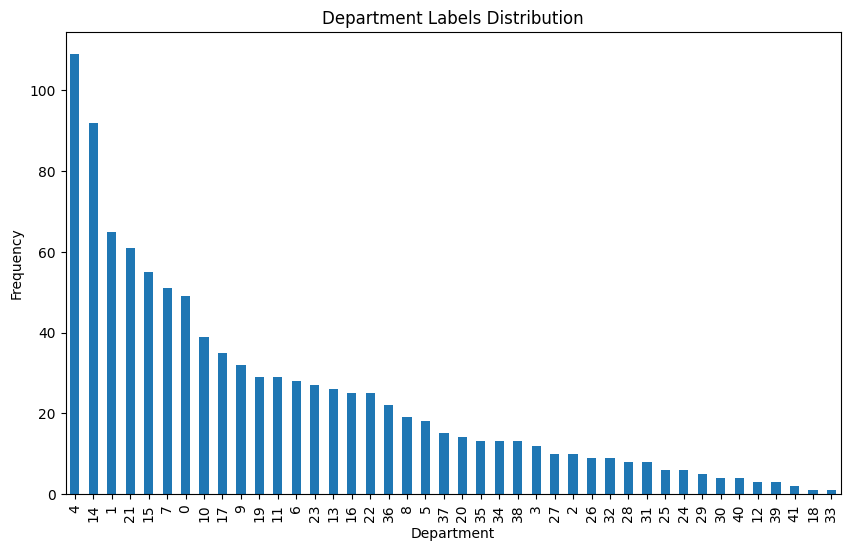

In [4]:
# Merge the labels with the graph data
nodes_data = pd.DataFrame(G.nodes(), columns=['node'])
nodes_data = nodes_data.merge(labels_df, on='node', how='left')

# Check for missing labels
missing_labels = nodes_data['department'].isnull().sum()
print(f"Missing labels: {missing_labels}")

# Visualize department distribution
plt.figure(figsize=(10, 6))
nodes_data['department'].value_counts().plot(kind='bar')
plt.title('Department Labels Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()


Computing resilience for the graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000


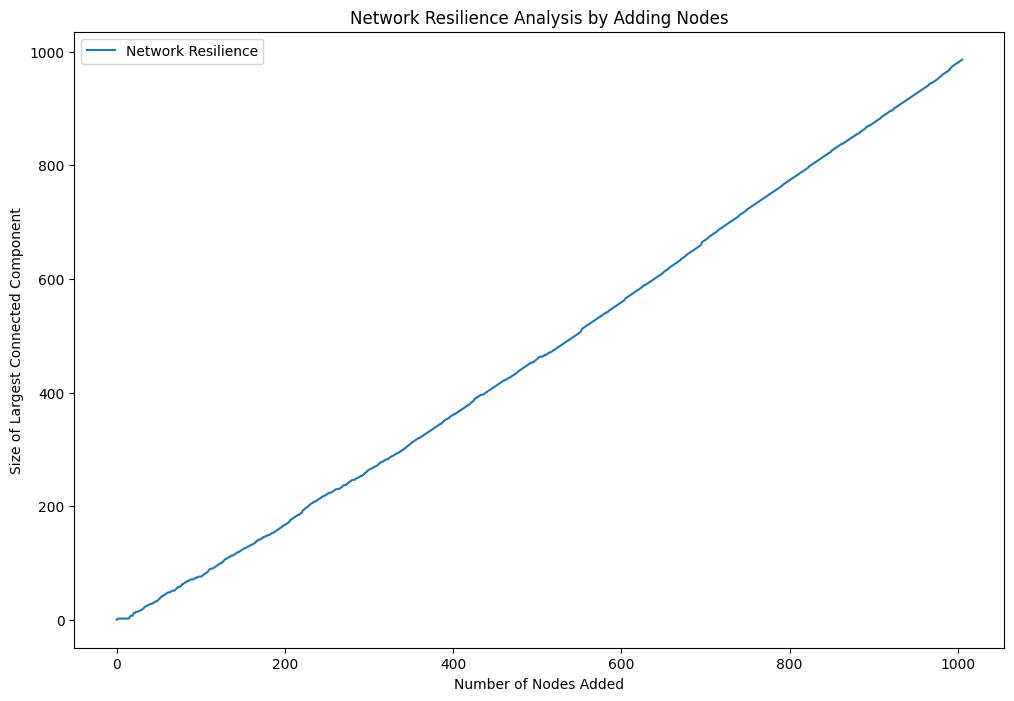

In [5]:
import random
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for adding nodes
attack_order = random_order(G)

# Compute resilience by adding nodes
print("Computing resilience for the graph by adding nodes...")
resilience = compute_resilience_adding_nodes(G, attack_order)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience, label='Network Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Resilience Analysis by Adding Nodes')
plt.legend()
plt.show()


In [6]:
import numpy as np
def generate_chung_lu(graph):
    """
    Generate a Chung Lu graph model based on the degree distribution of the input graph.
    """
    degree_sequence = [degree for node, degree in graph.degree()]
    W = np.array(degree_sequence)
    n = len(W)
    CL_graph = nx.Graph()
    CL_graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.rand() < (W[i] * W[j]) / (2 * sum(W)):
                CL_graph.add_edge(i, j)
    return CL_graph

def UPA_graph(n, m):
    """
    Generate an UPA graph using NetworkX's powerlaw_cluster_graph.
    """
    return nx.powerlaw_cluster_graph(n, m, 0.0)

# Generate Chung-Lu and UPA models
chung_lu_graph = generate_chung_lu(G)
upa_graph = UPA_graph(G.number_of_nodes(), 3)  # Adjust 'm' based on the average degree of the original graph


Computing resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the Chung Lu model by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the UPA model by adding nodes...
Progress: 10.0% - Nodes processed:

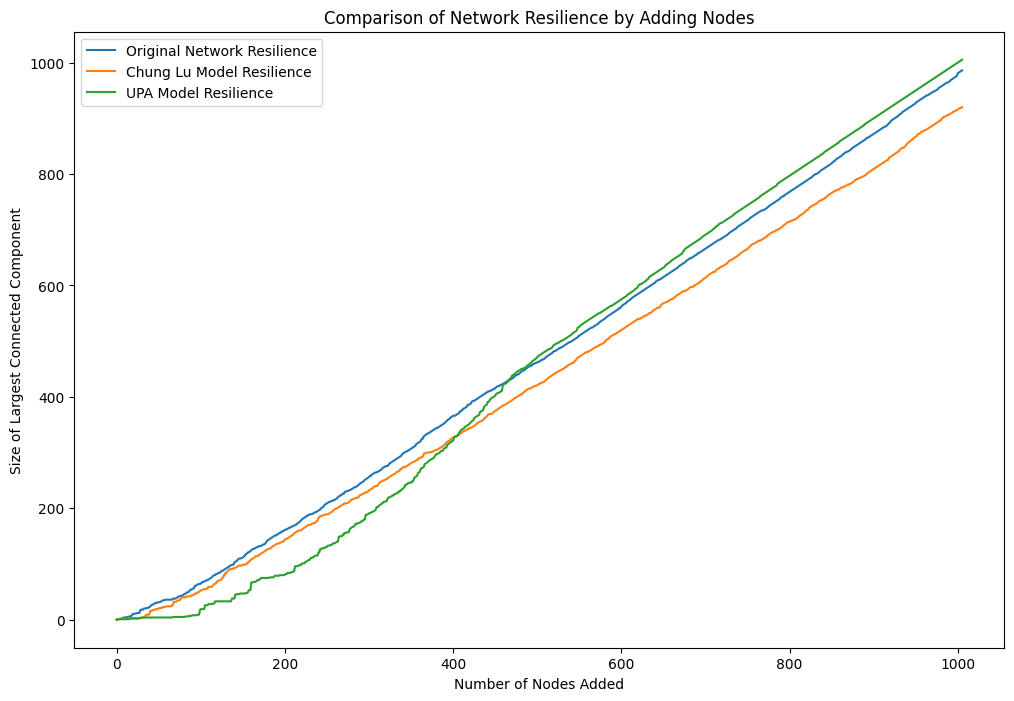

In [7]:
def random_order(graph):
    """
    Generate a random order of nodes for adding to the graph.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_adding_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        # Add edges connected to the new node
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for adding nodes
attack_order_original = random_order(G)
attack_order_cl = random_order(chung_lu_graph)
attack_order_upa = random_order(upa_graph)

# Compute resilience by adding nodes
print("Computing resilience for the original graph by adding nodes...")
resilience_original = compute_resilience_adding_nodes(G, attack_order_original)
print("Computing resilience for the Chung Lu model by adding nodes...")
resilience_cl = compute_resilience_adding_nodes(chung_lu_graph, attack_order_cl)
print("Computing resilience for the UPA model by adding nodes...")
resilience_upa = compute_resilience_adding_nodes(upa_graph, attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Added')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Adding Nodes')
plt.legend()
plt.show()


In [8]:
import networkx as nx
import pandas as pd
from networkx.algorithms.centrality import betweenness_centrality, closeness_centrality, degree_centrality

# Calculate centrality measures
betweenness = betweenness_centrality(G)
closeness = closeness_centrality(G)
degree = degree_centrality(G)

# Create a DataFrame with features
features_df = pd.DataFrame({
    'node': list(G.nodes()),
    'betweenness': [betweenness[node] for node in G.nodes()],
    'closeness': [closeness[node] for node in G.nodes()],
    'degree': [degree[node] for node in G.nodes()]
})

# Merge with labels
features_df = features_df.merge(labels_df, left_on='node', right_on='node', how='left')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data
X = features_df[['betweenness', 'closeness', 'degree']]
y = features_df['department']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.09      0.06      0.07        16
           1       0.05      0.06      0.05        18
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         9
           4       0.09      0.14      0.11        28
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.08      0.13      0.10        15
           8       0.00      0.00      0.00         6
           9       0.12      0.08      0.10        12
          10       0.12      0.09      0.11        11
          11       0.17      0.09      0.12        11
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         7
          14       0.33      0.39      0.36        28
          15       0.07      0.06      0.07        16
          16       0.00      0.00      0.00         7
          17       0.08    

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

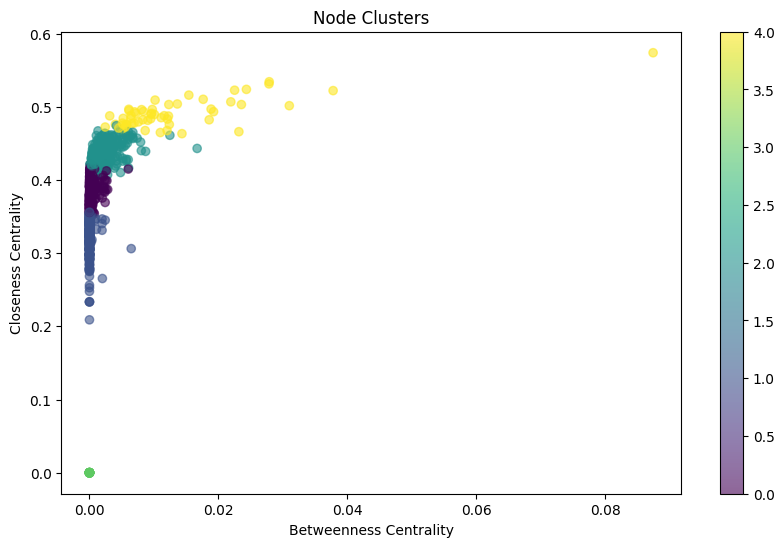

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
features_df['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_df['betweenness'], features_df['closeness'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Node Clusters')
plt.colorbar()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for predictive modeling
data = pd.DataFrame({
    'resilience_original': resilience_original,
    'resilience_cl': resilience_cl,
    'resilience_upa': resilience_upa
})

X = data[['resilience_original', 'resilience_cl']]
y = data['resilience_upa']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.5063515205020146


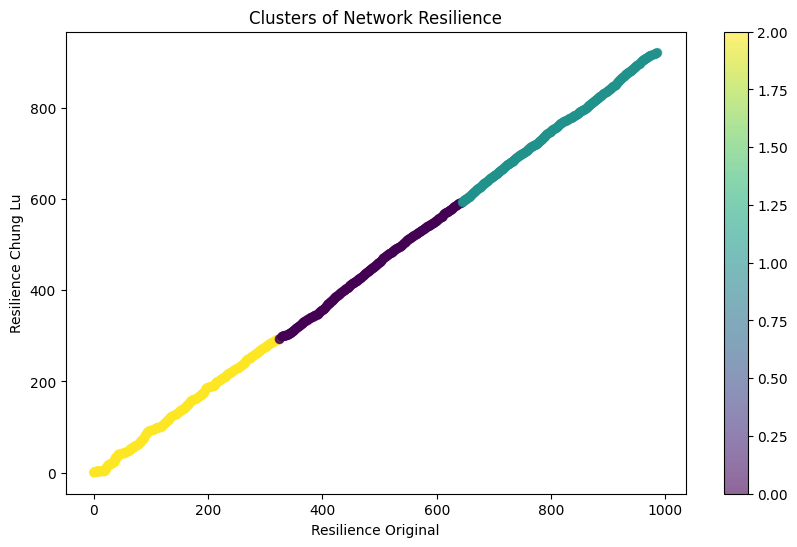

In [12]:
from sklearn.cluster import KMeans

# Clustering based on resilience
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)

# Add clusters to the DataFrame
data['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['resilience_original'], data['resilience_cl'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Resilience Original')
plt.ylabel('Resilience Chung Lu')
plt.title('Clusters of Network Resilience')
plt.colorbar()
plt.show()


In [13]:
# Prepare data for clustering
data_upa = pd.DataFrame({
    'resilience_upa': resilience_upa,
    'resilience_original': resilience_original[:len(resilience_upa)]
})


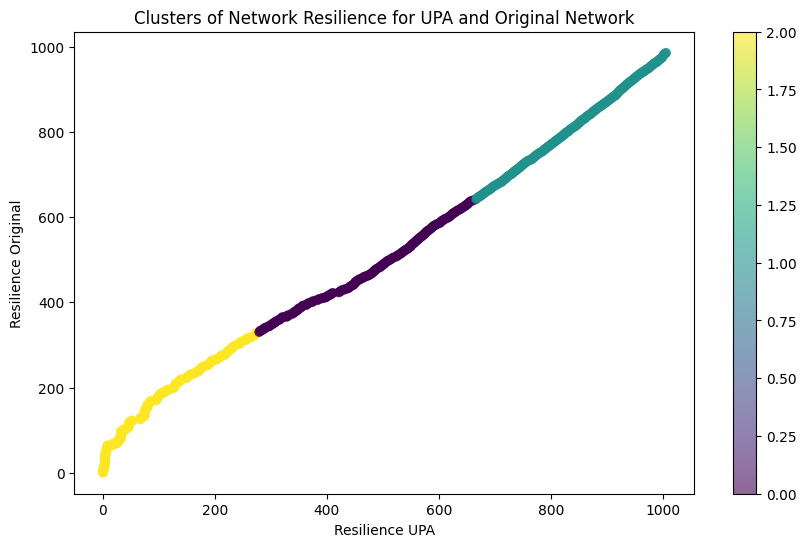

In [14]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans_upa = KMeans(n_clusters=3, random_state=42)
clusters_upa = kmeans_upa.fit_predict(data_upa)

# Add cluster labels to the DataFrame
data_upa['cluster'] = clusters_upa

# Visualize clusters for UPA and Original Network Resilience
plt.figure(figsize=(10, 6))
plt.scatter(data_upa['resilience_upa'], data_upa['resilience_original'], c=clusters_upa, cmap='viridis', alpha=0.6)
plt.xlabel('Resilience UPA')
plt.ylabel('Resilience Original')
plt.title('Clusters of Network Resilience for UPA and Original Network')
plt.colorbar()
plt.show()


In [15]:
from networkx.algorithms.community import girvan_newman, label_propagation_communities

# Using Girvan-Newman algorithm
communities = girvan_newman(G)
first_level_communities = next(communities)
community_dict = {node: cid for cid, community in enumerate(first_level_communities) for node in community}

# Add community information to nodes
nx.set_node_attributes(G, community_dict, 'community')

# Display number of communities
num_communities = len(set(community_dict.values()))
print(f"Number of communities detected: {num_communities}")


Number of communities detected: 21


In [16]:
def compute_community_resilience(graph, attack_order):
    """
    Compute the resilience of communities in the graph as nodes are added according to attack_order.
    """
    resilience = [0]  # Start with an empty graph
    community_sizes = {cid: [] for cid in set(nx.get_node_attributes(graph, 'community').values())}
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        
        # Track community sizes
        for cid in community_sizes:
            community_nodes = [n for n in added_graph.nodes if graph.nodes[n].get('community') == cid]
            largest_component = max(nx.connected_components(added_graph.subgraph(community_nodes)), key=len, default=set())
            community_sizes[cid].append(len(largest_component))
        
        if (i + 1) % (len(attack_order) // 10) == 0:
            print(f"Progress: {100 * (i + 1) / len(attack_order):.1f}% - Nodes processed: {i + 1}")
    
    return community_sizes

# Compute community resilience
print("Computing community resilience for the original graph by adding nodes...")
community_resilience_original = compute_community_resilience(G, attack_order_original)


Computing community resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000


Computing resilience for the original graph by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the Chung Lu model by adding nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the UPA model by adding nodes...
Progress: 10.0% - Nodes processed:

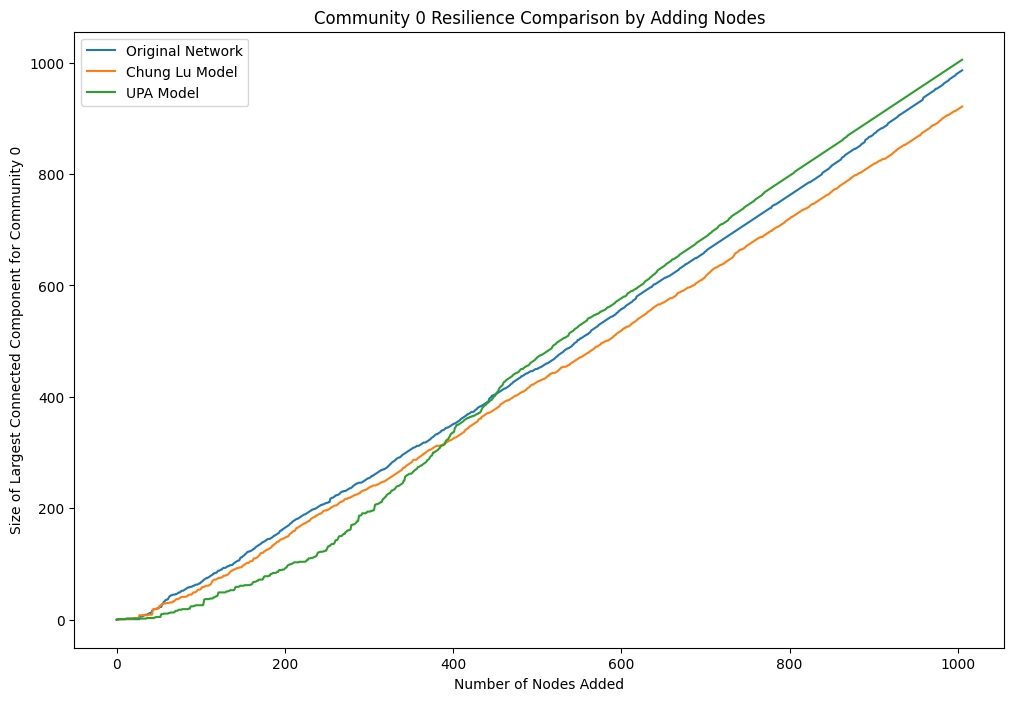

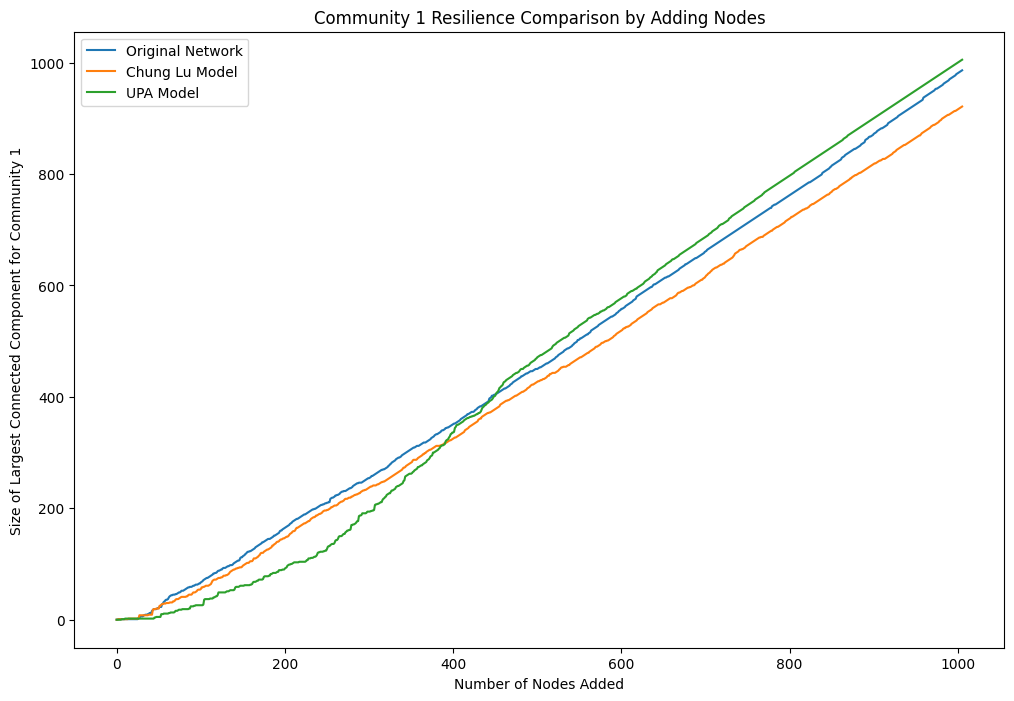

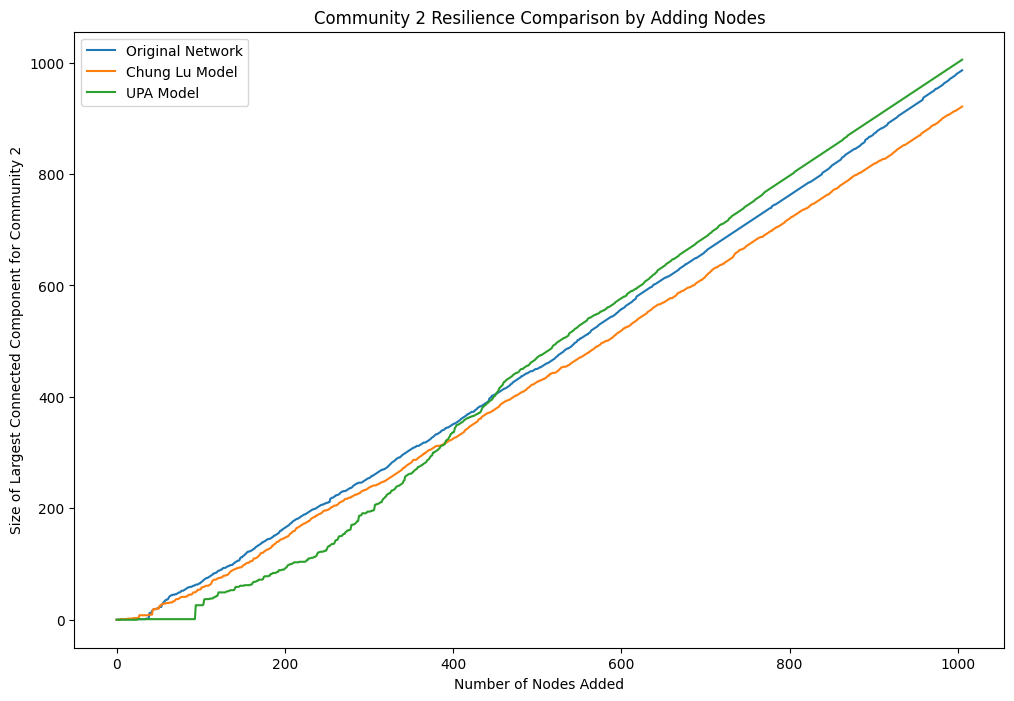

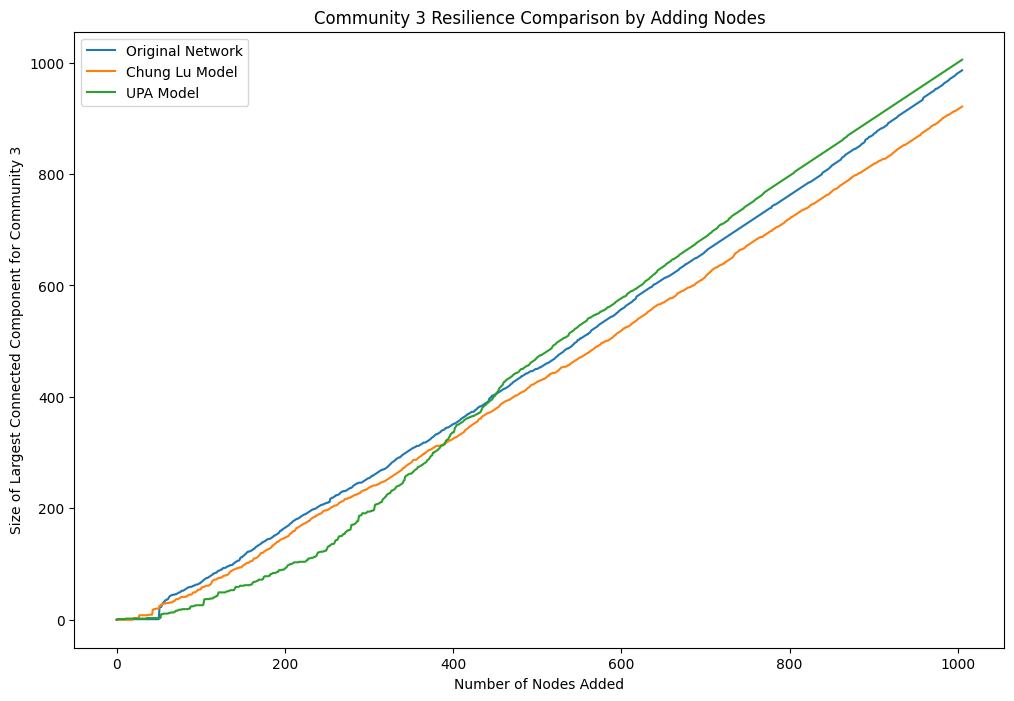

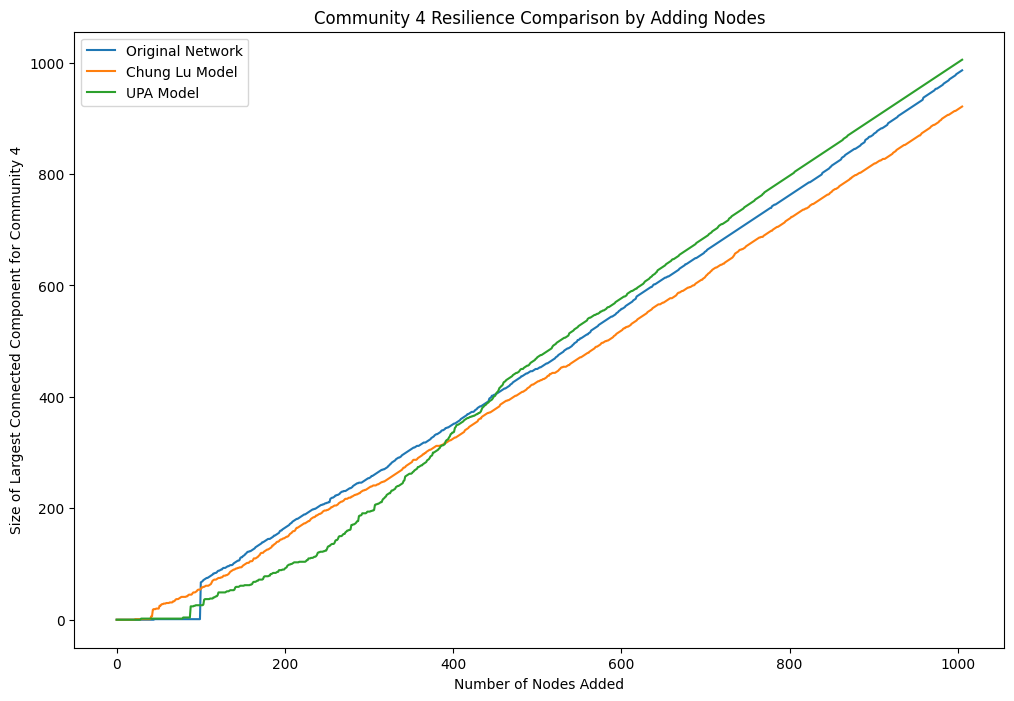

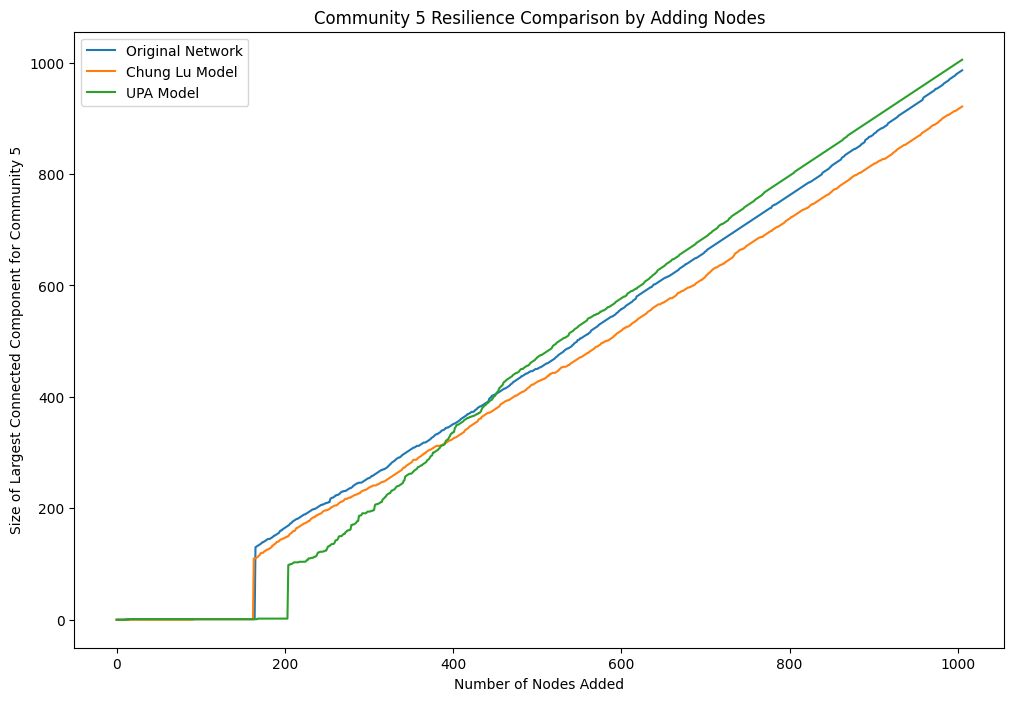

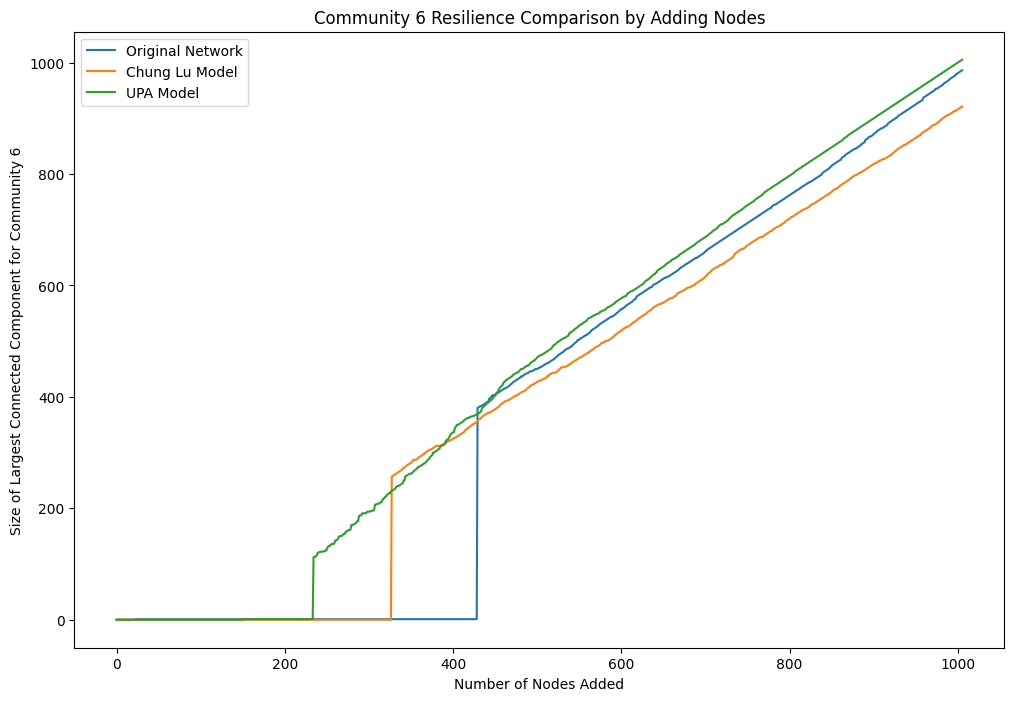

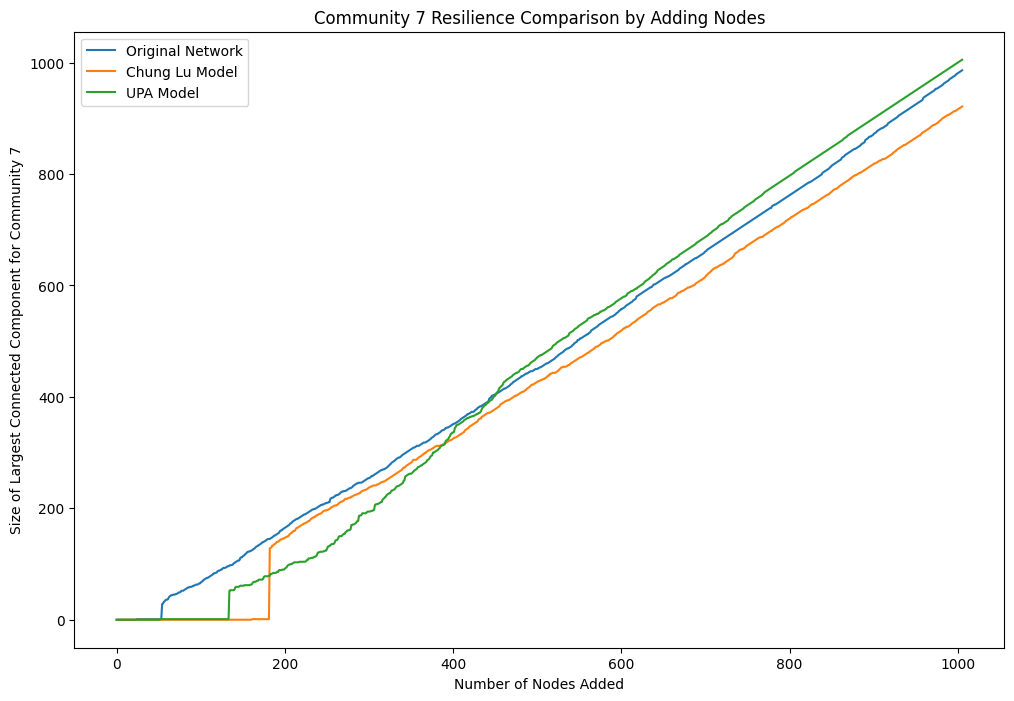

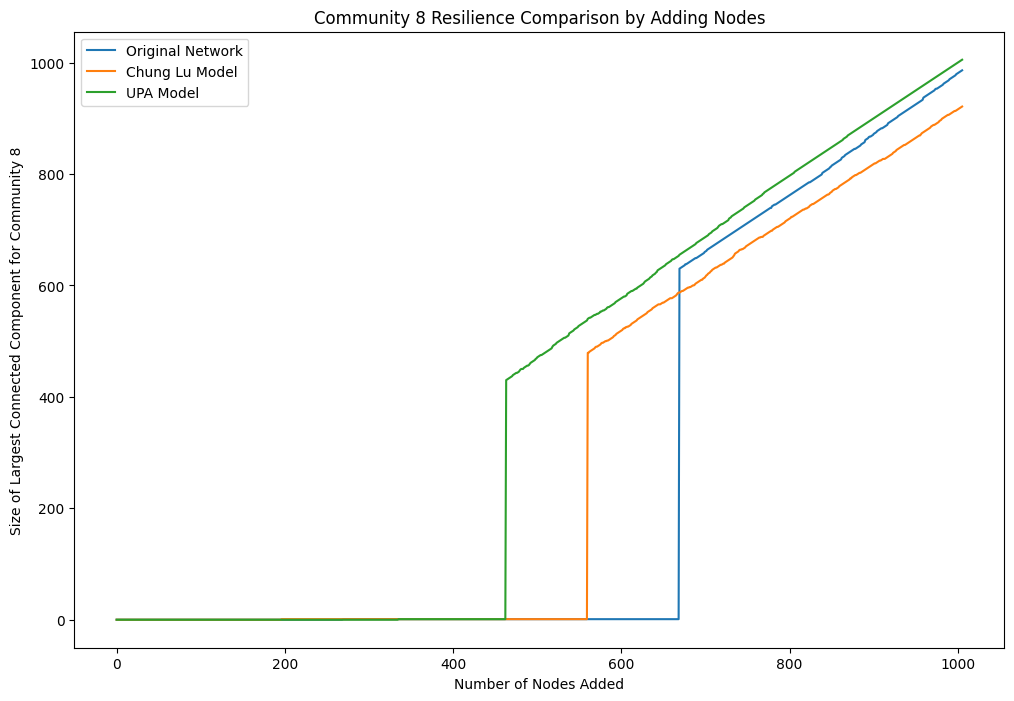

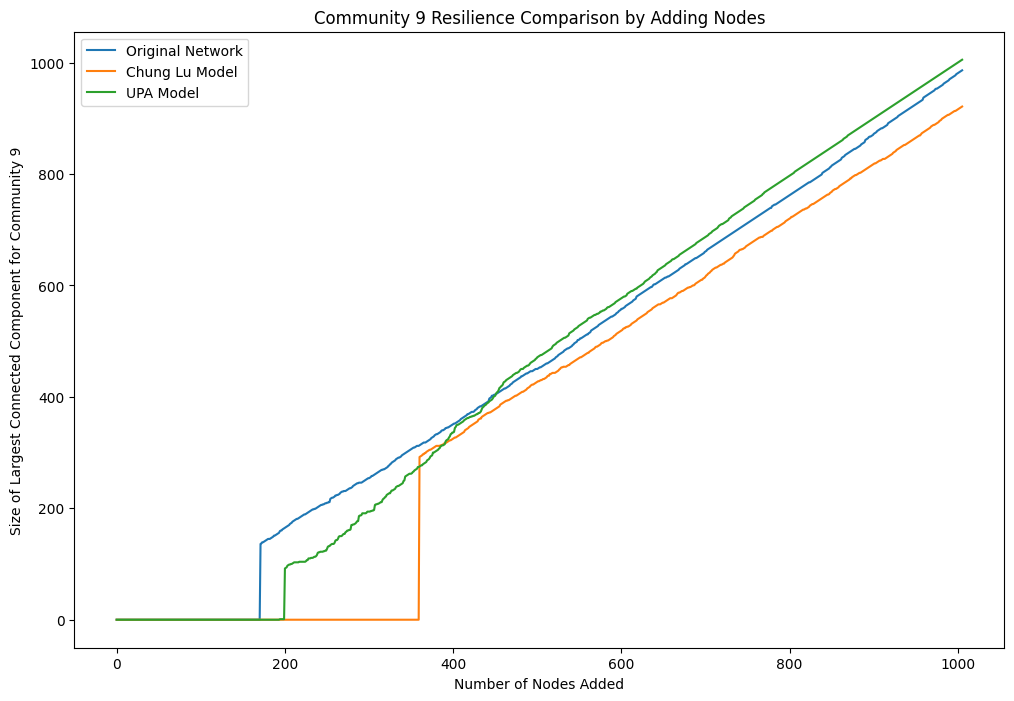

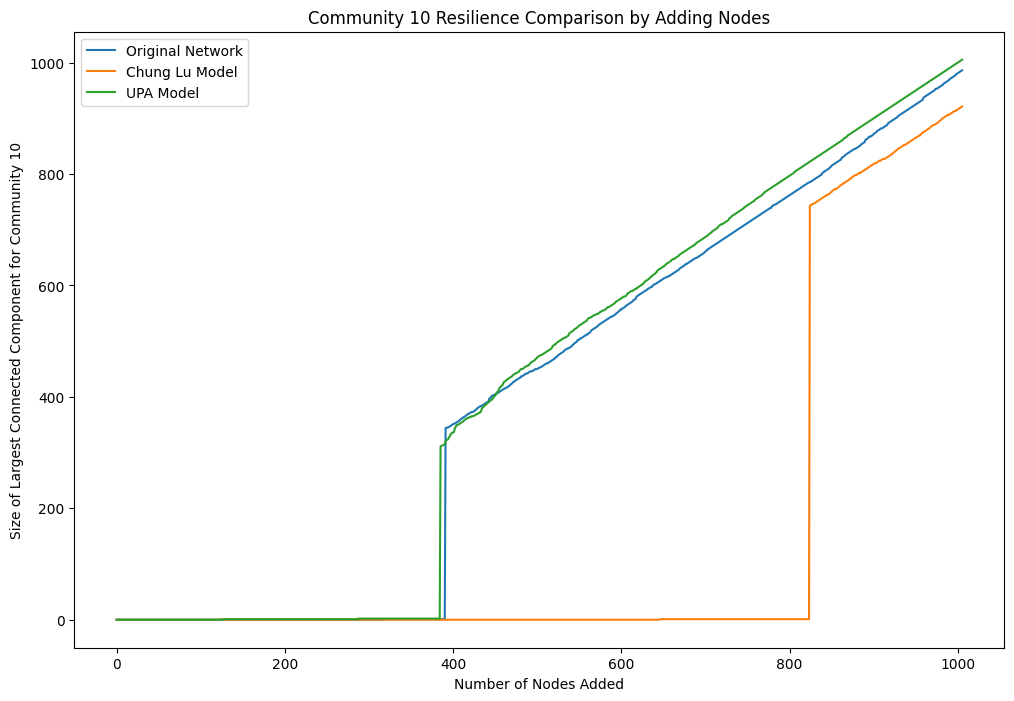

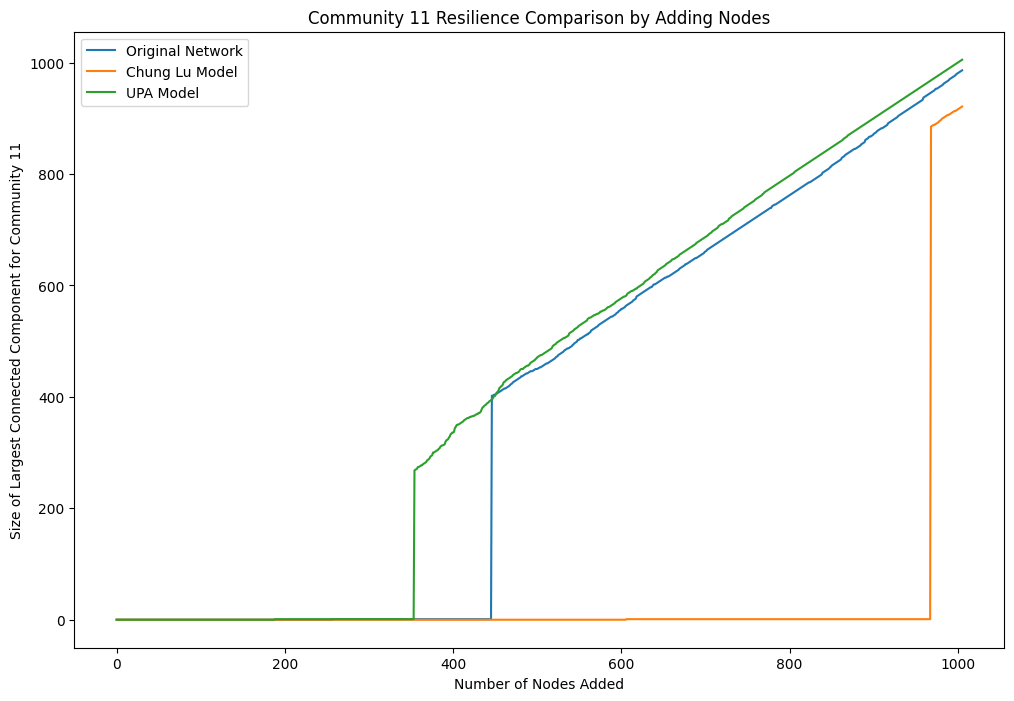

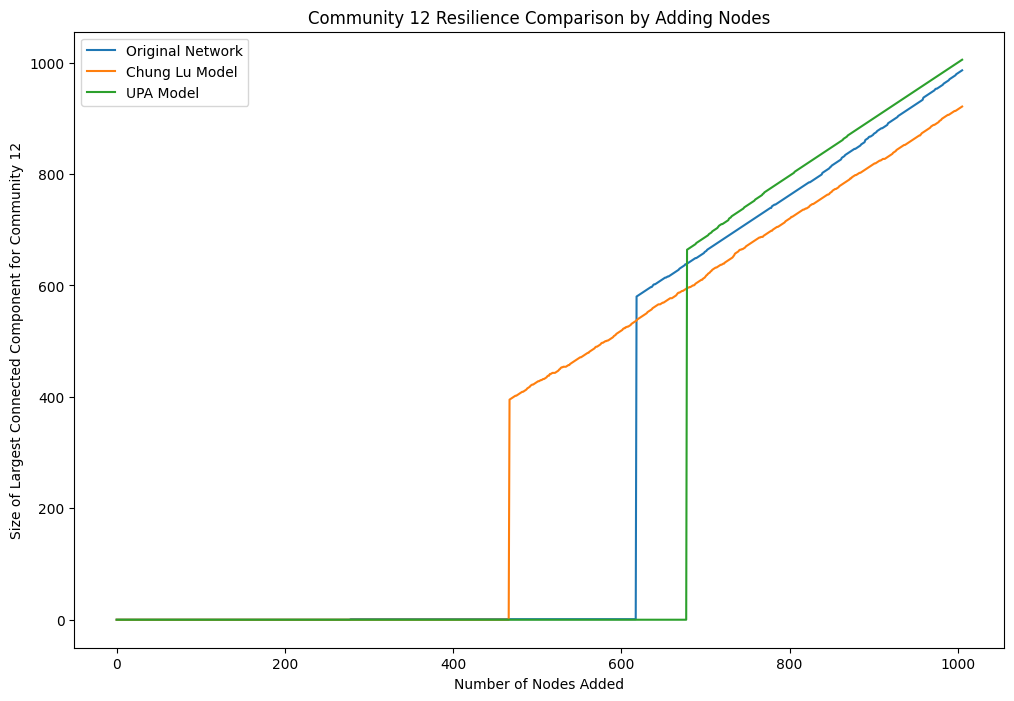

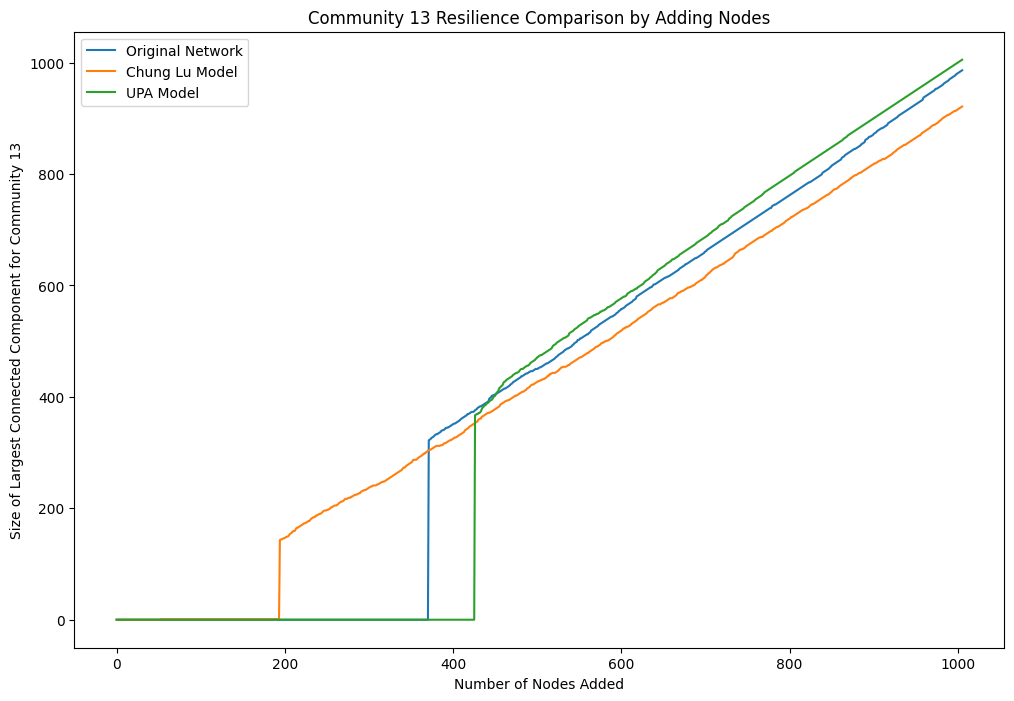

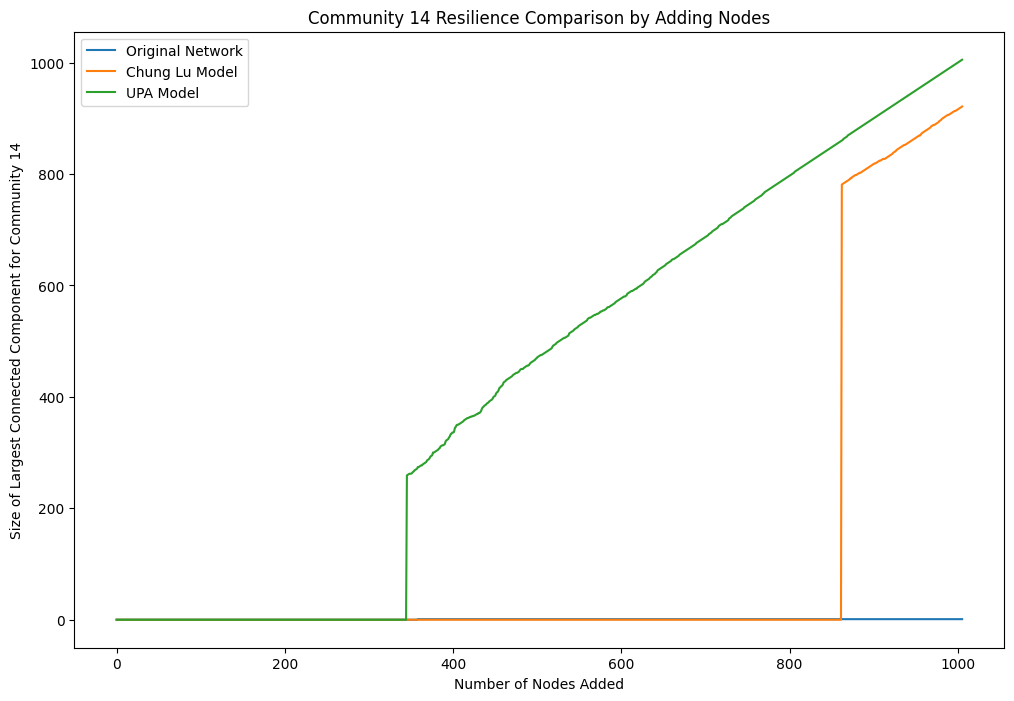

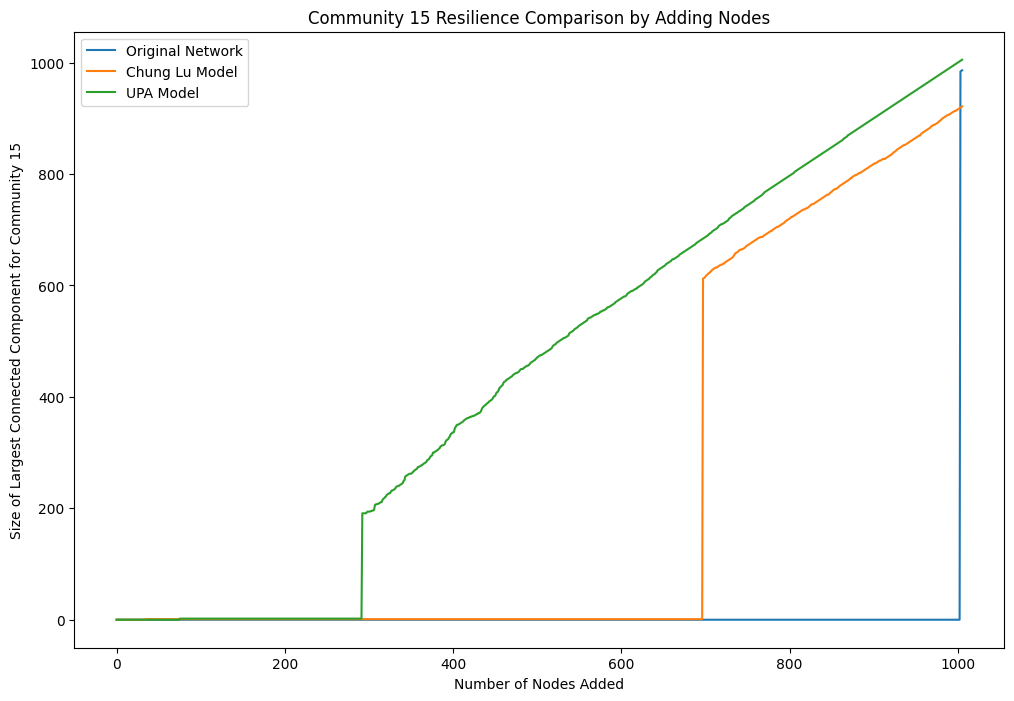

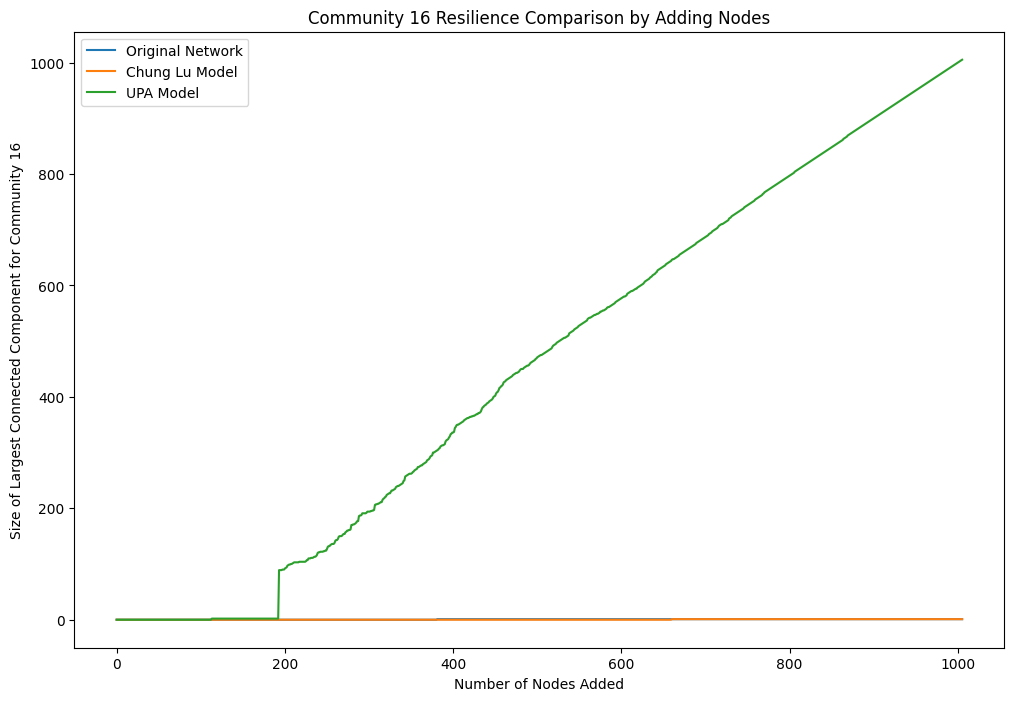

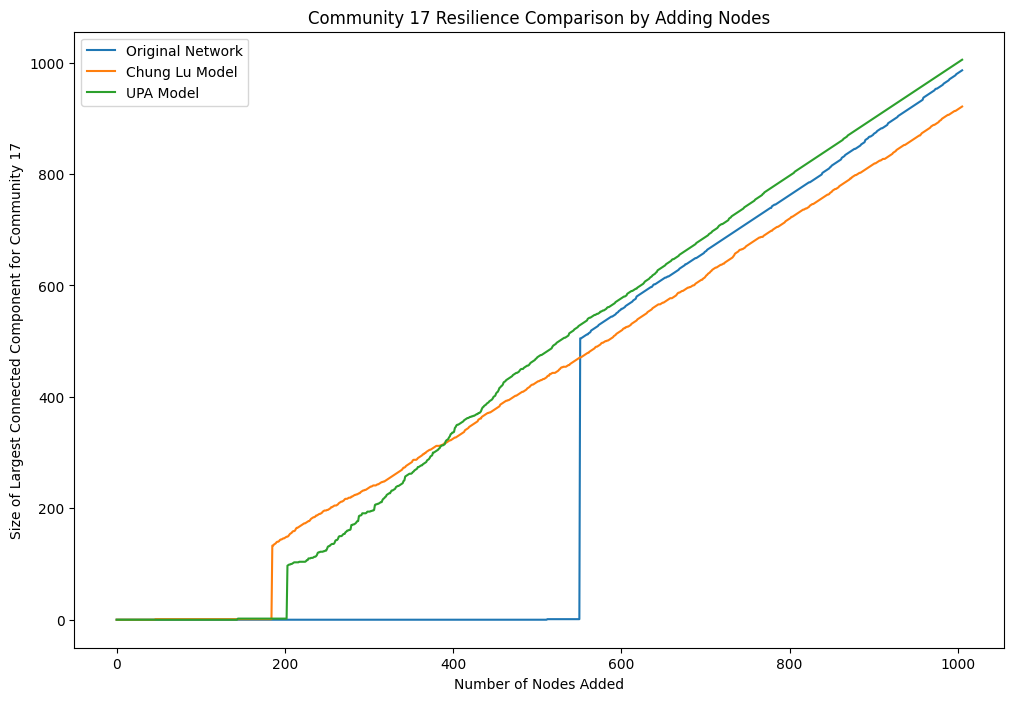

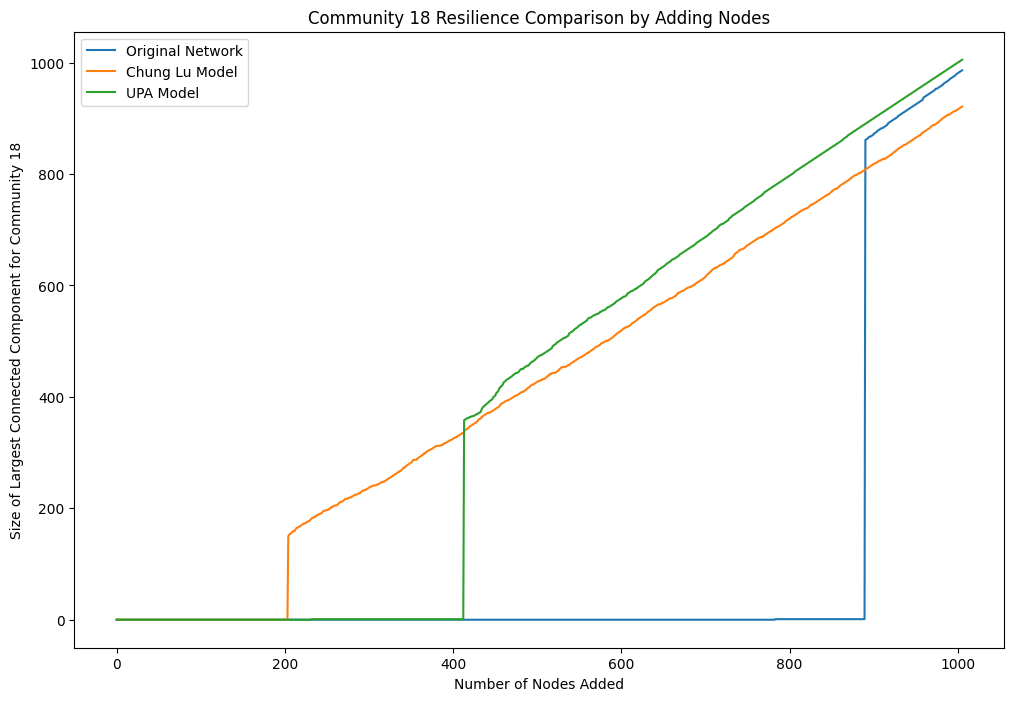

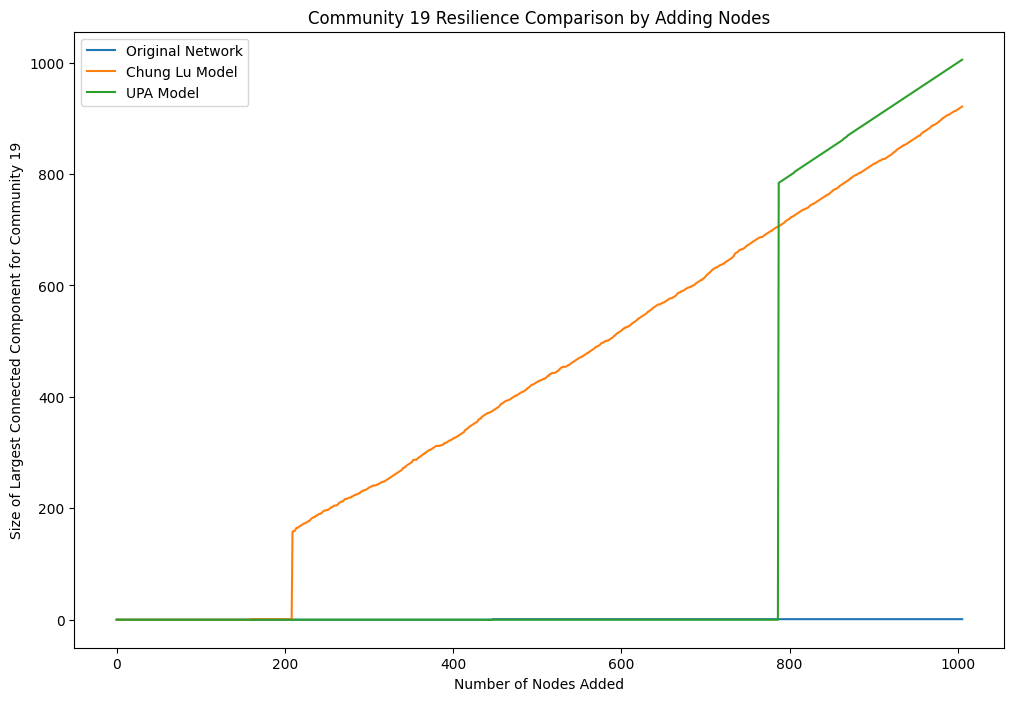

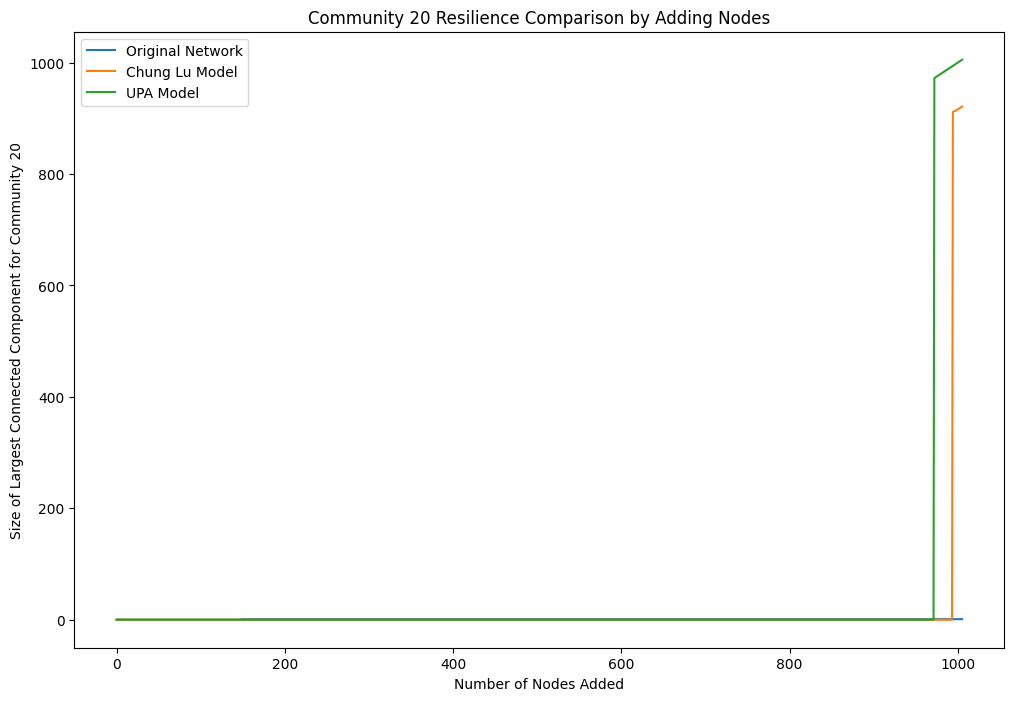

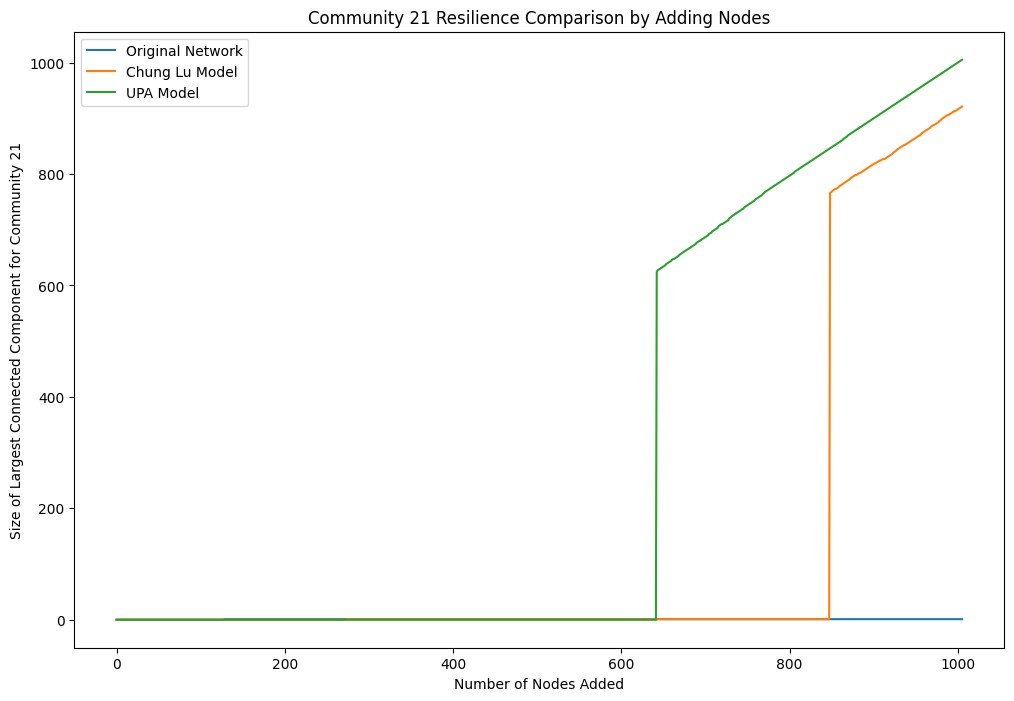

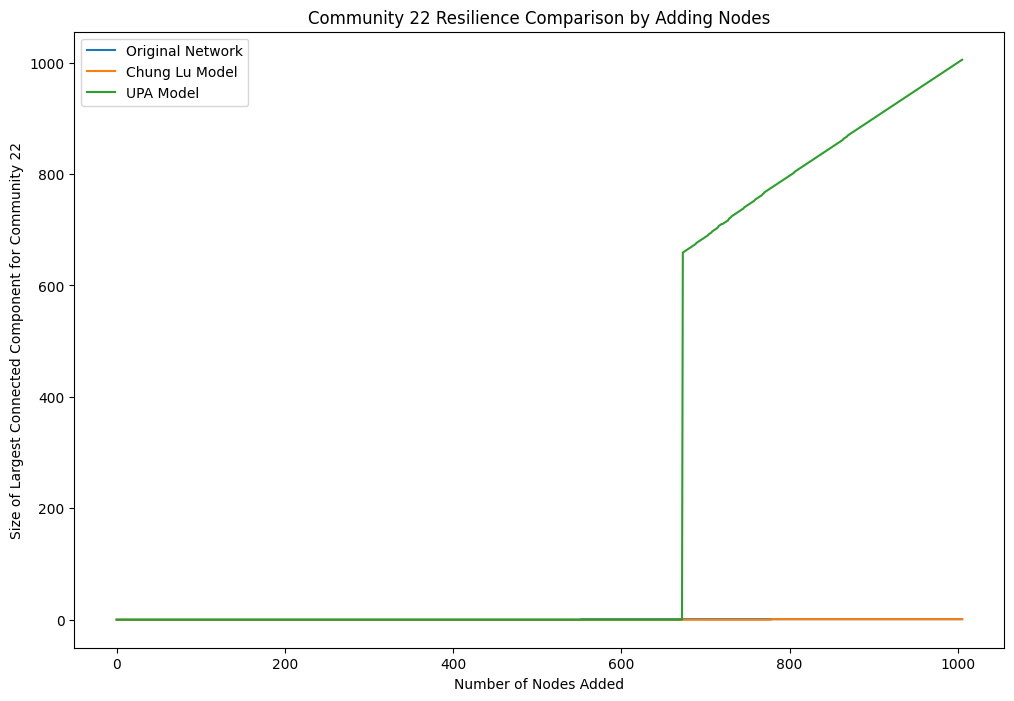

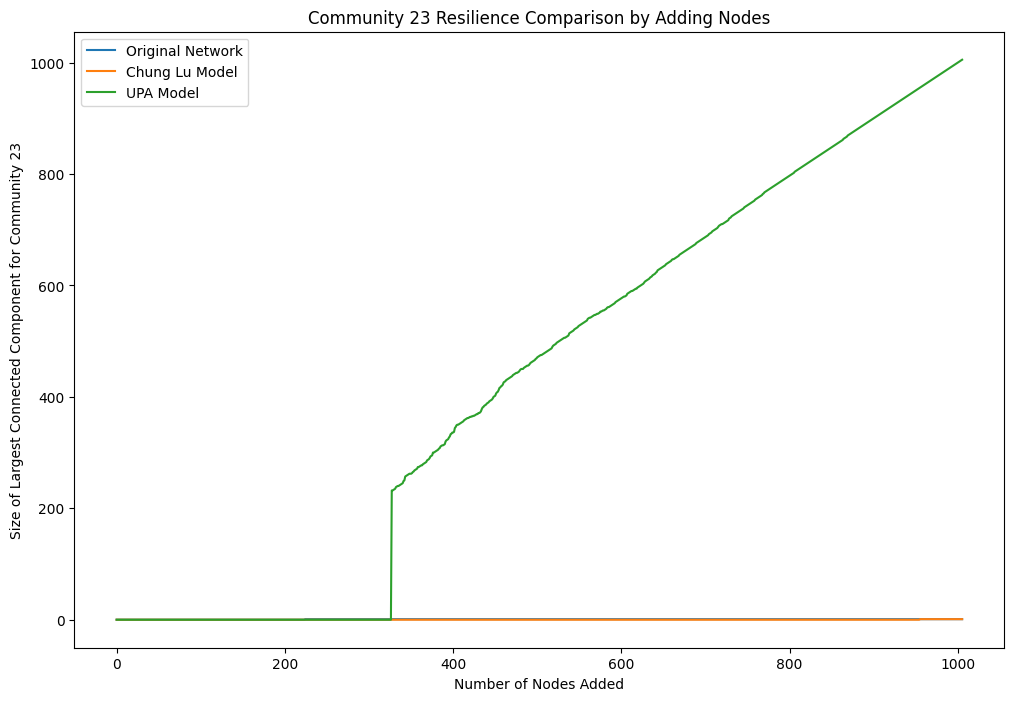

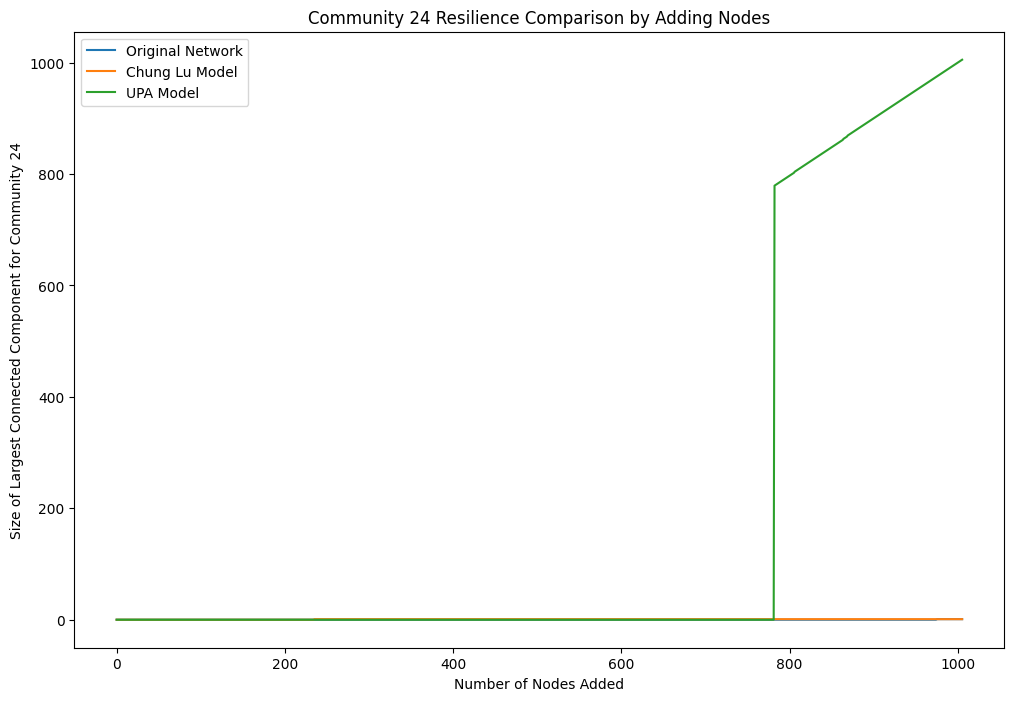

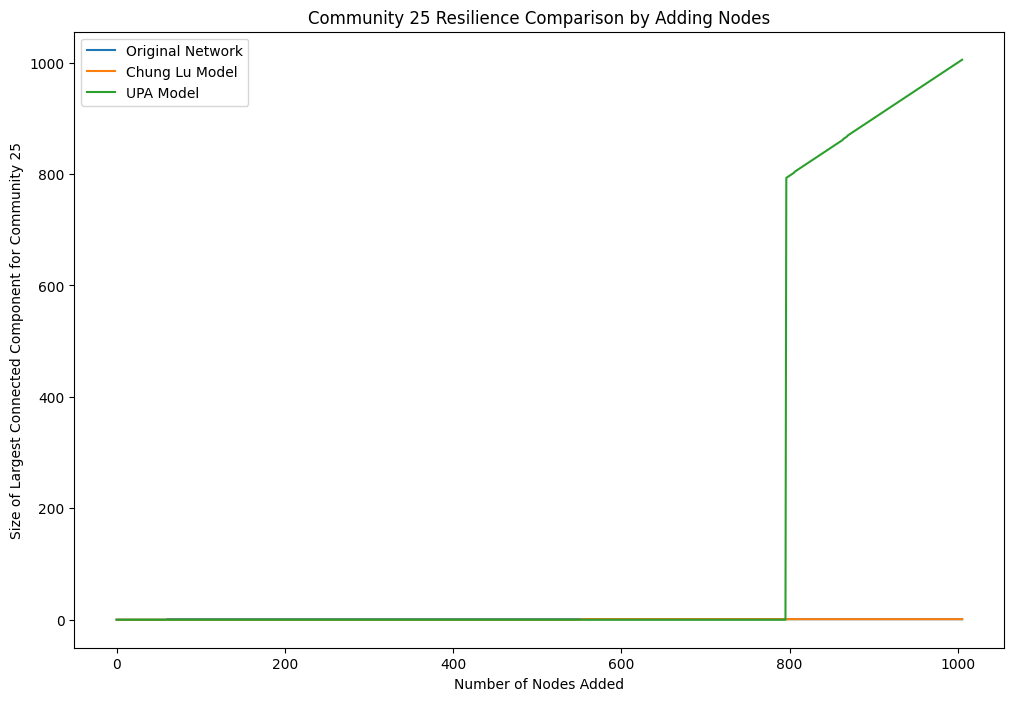

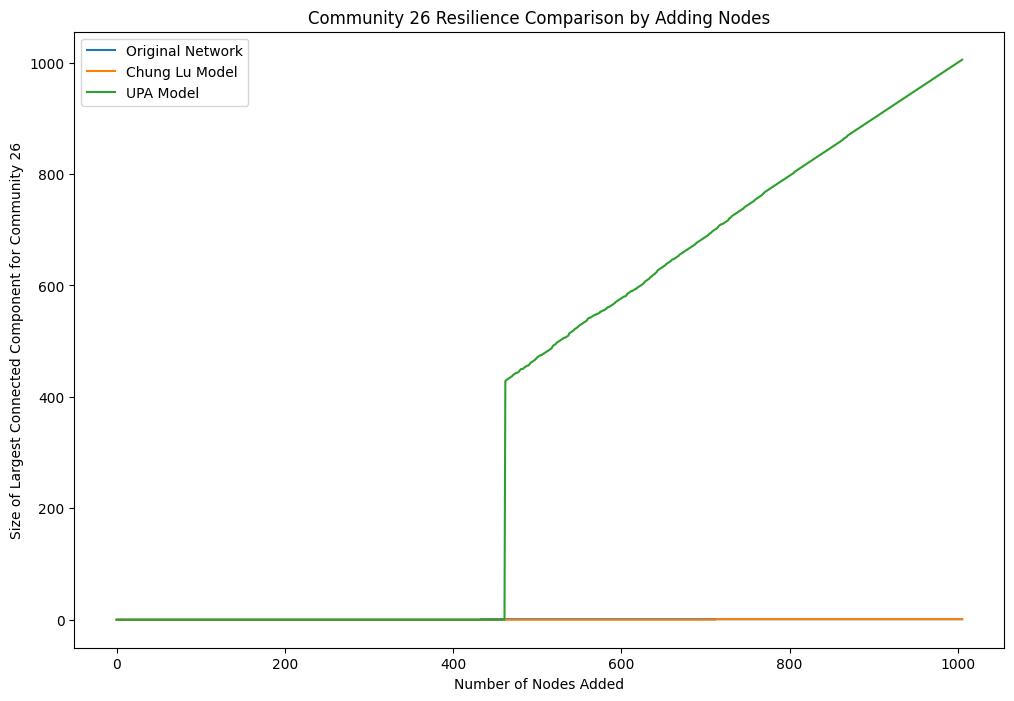

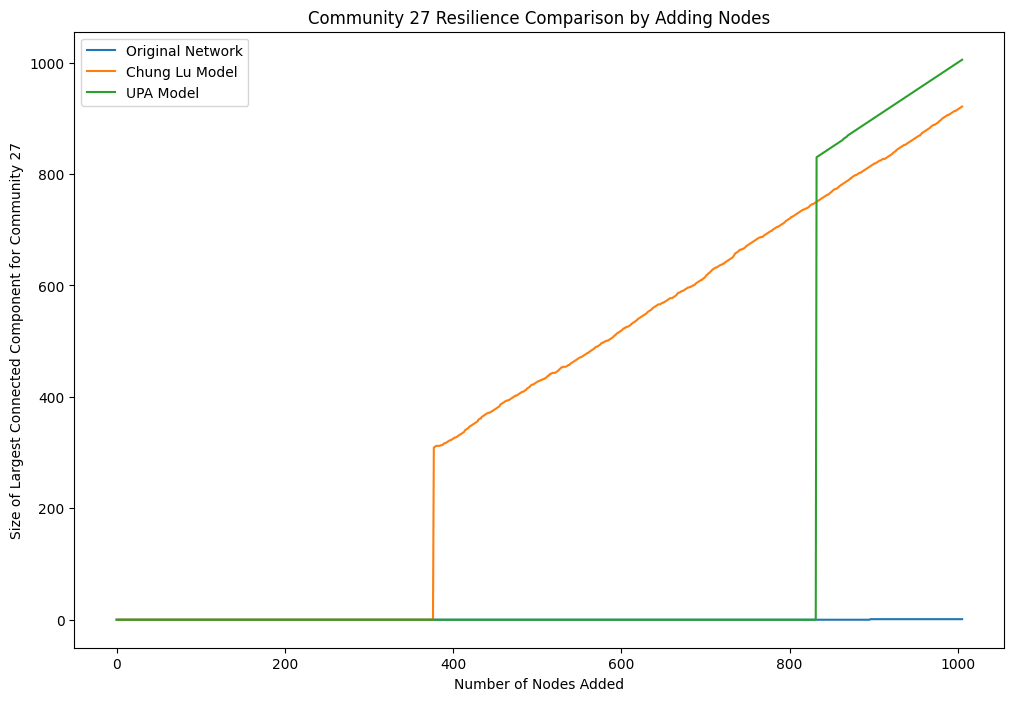

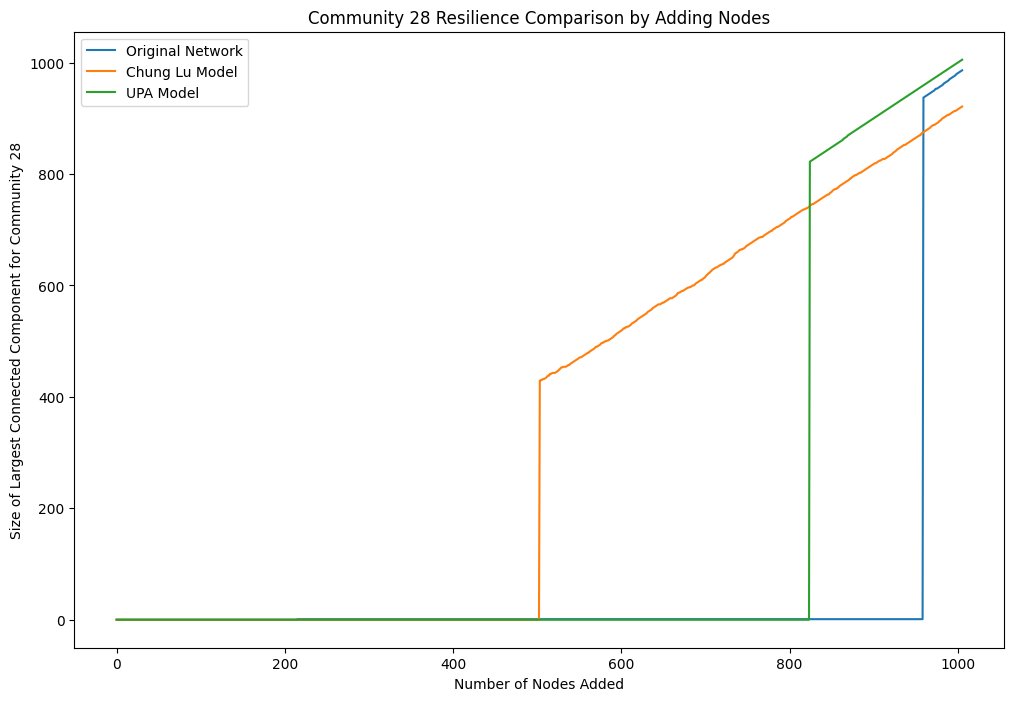

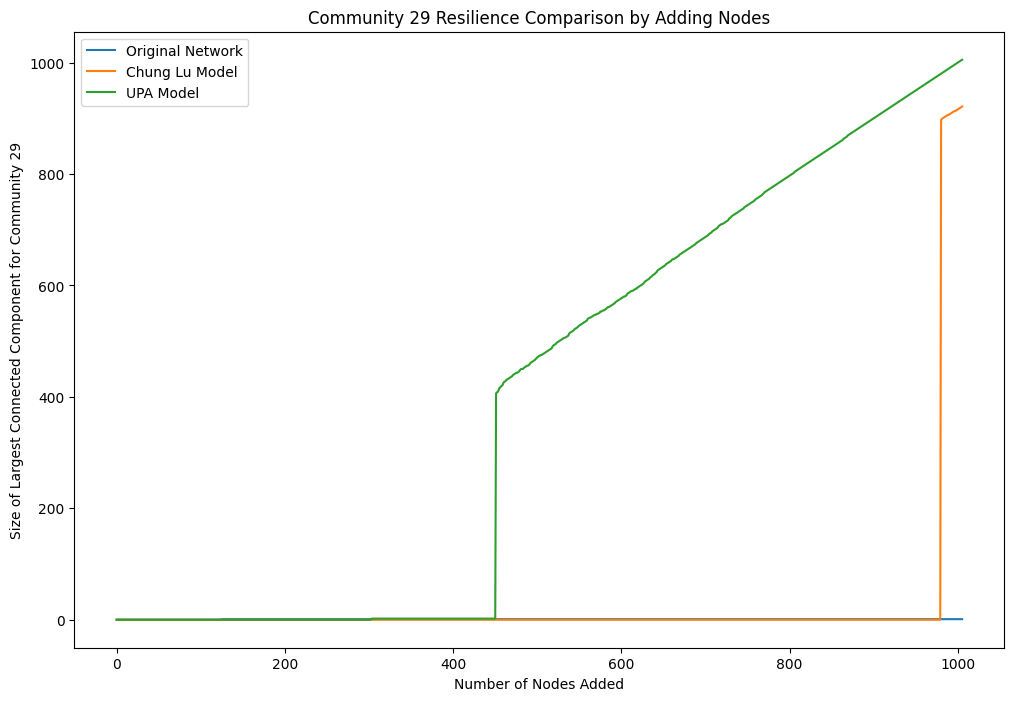

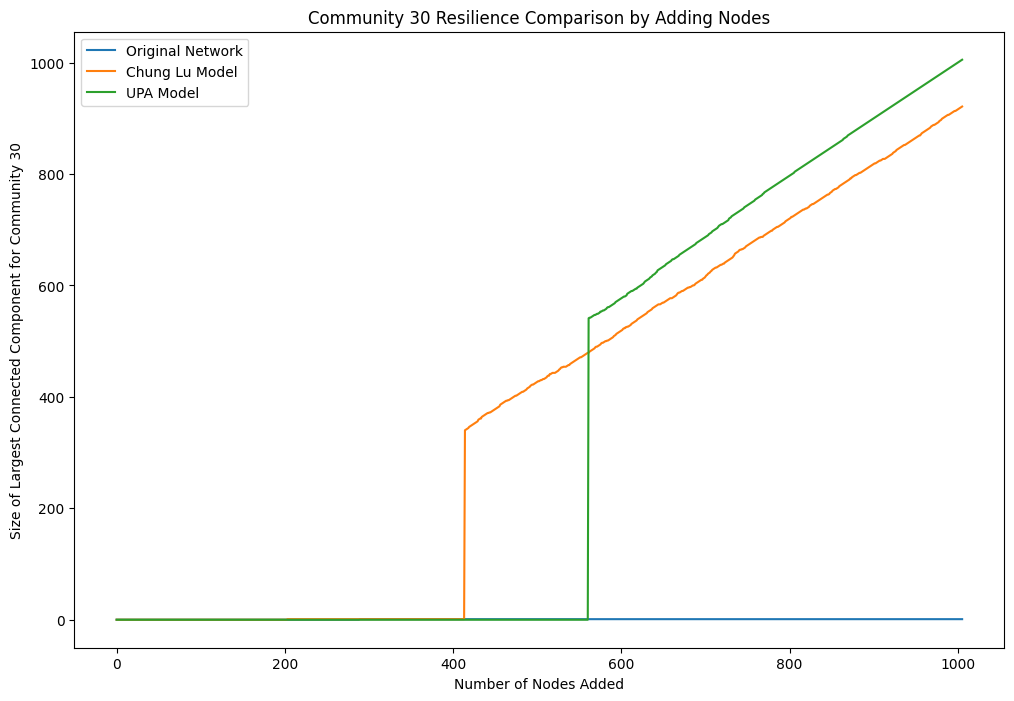

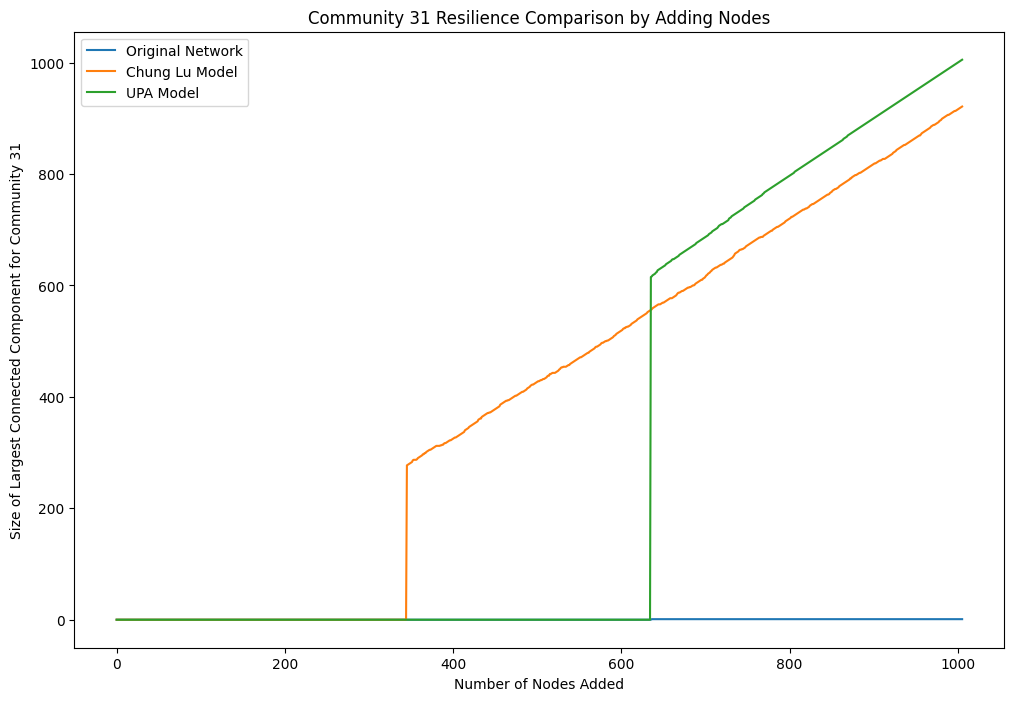

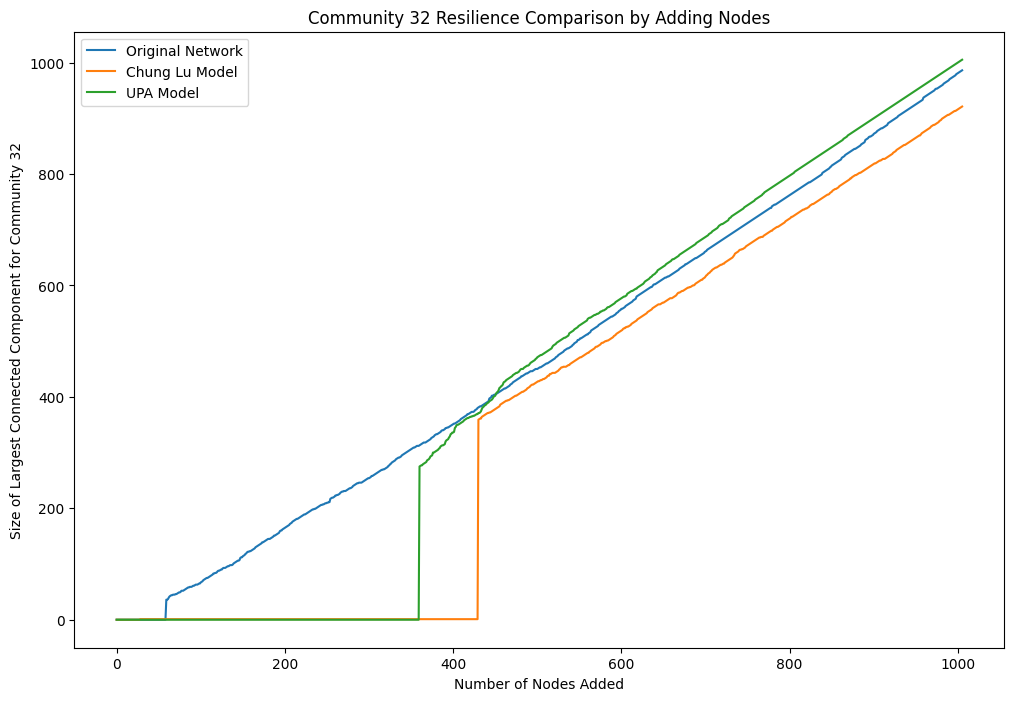

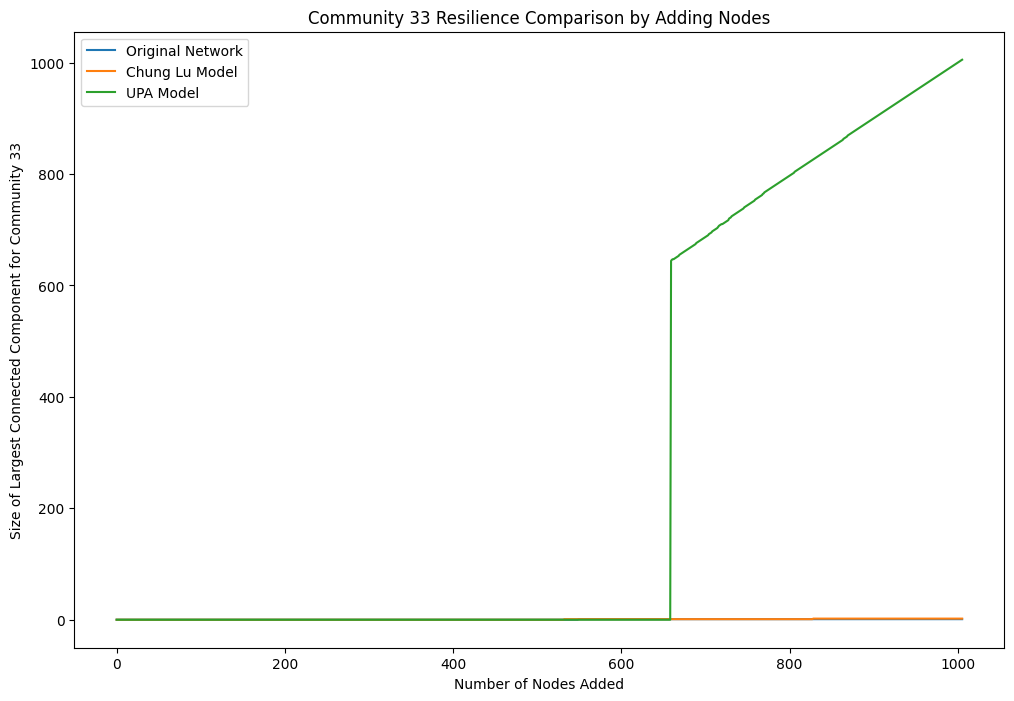

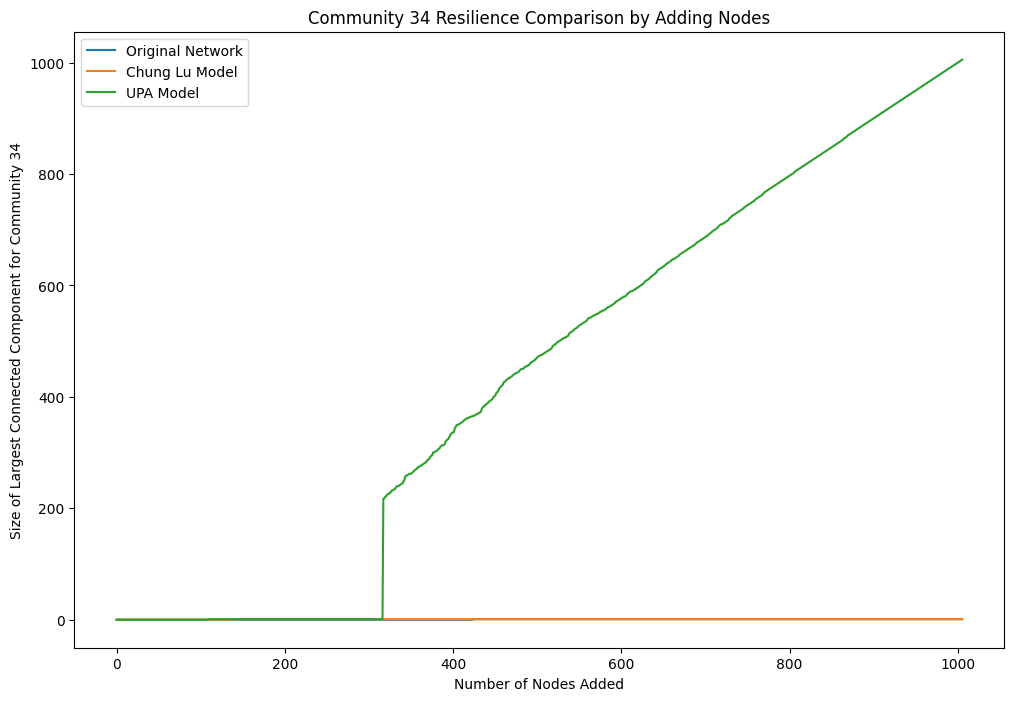

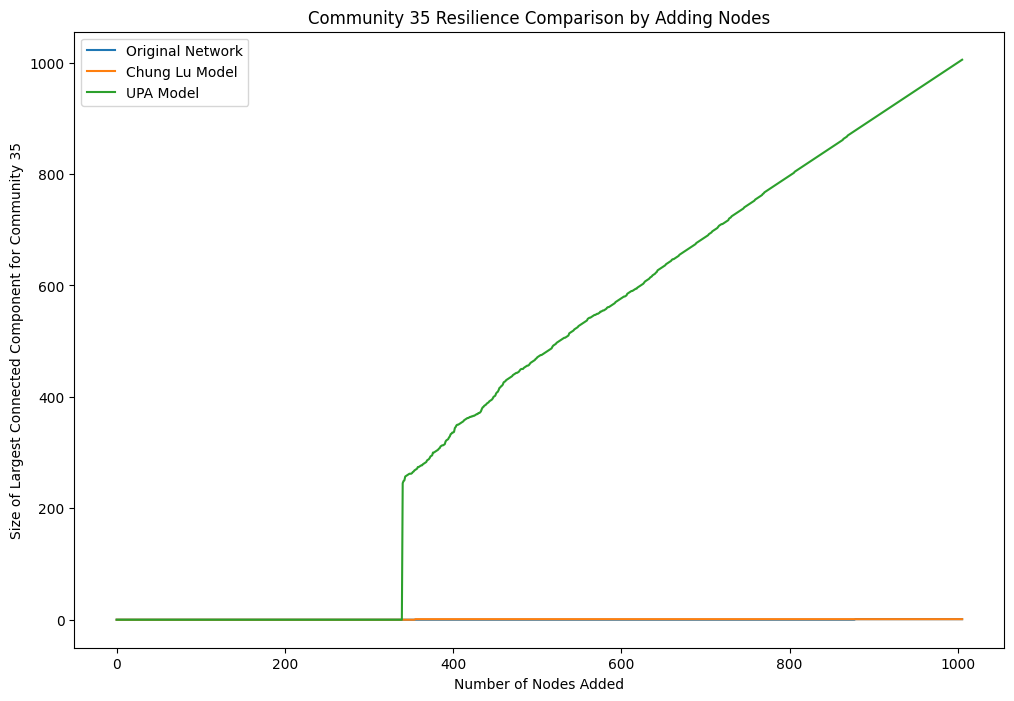

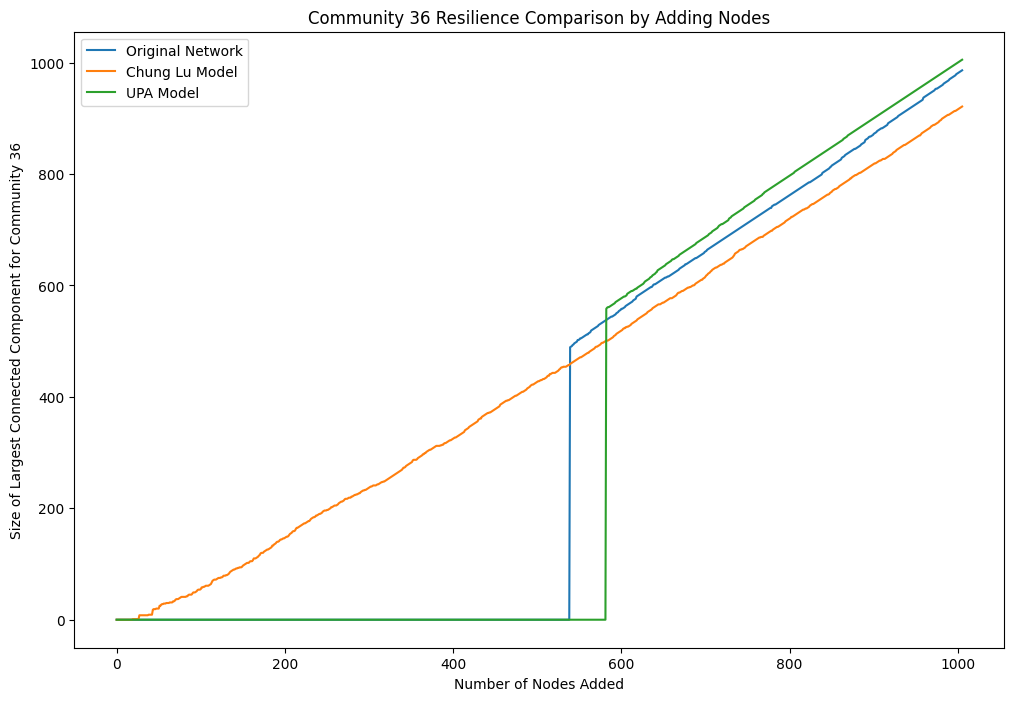

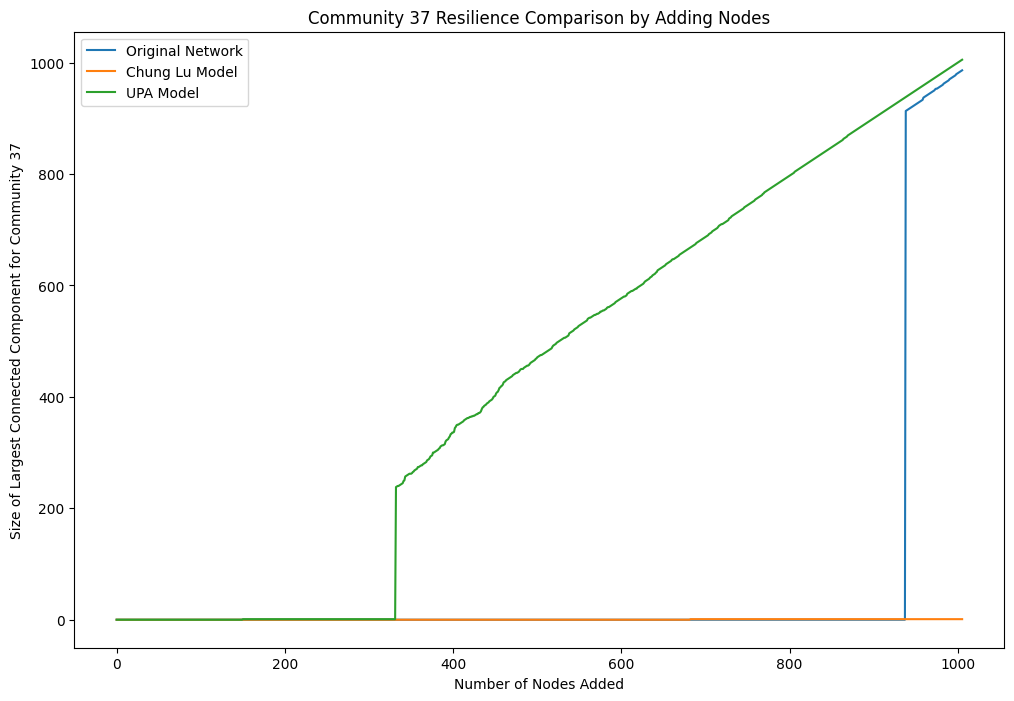

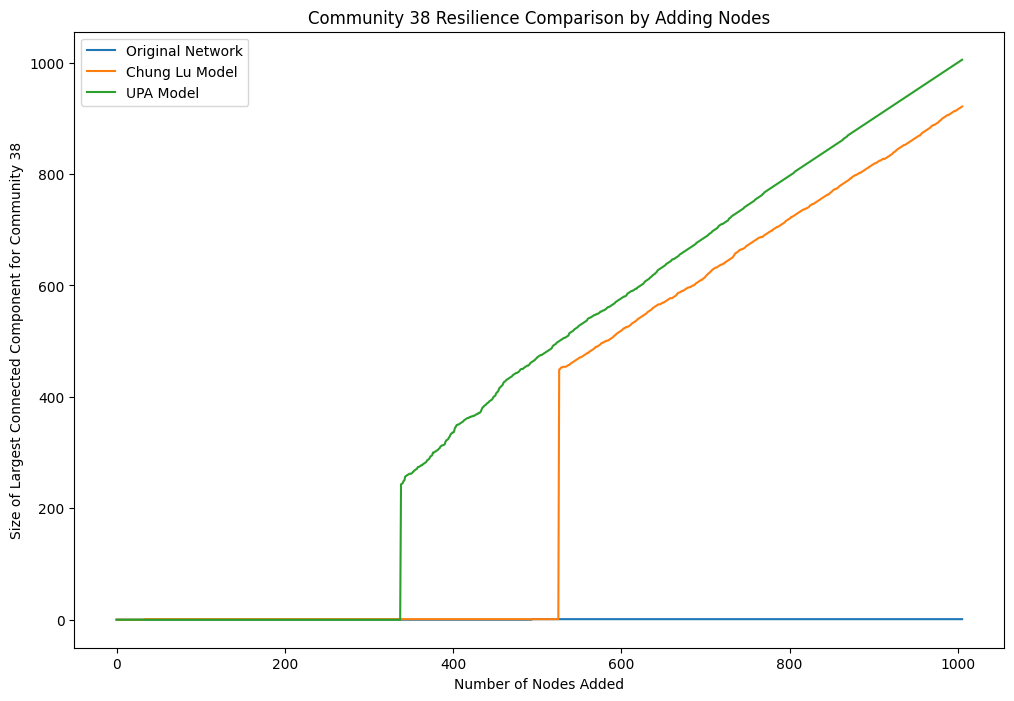

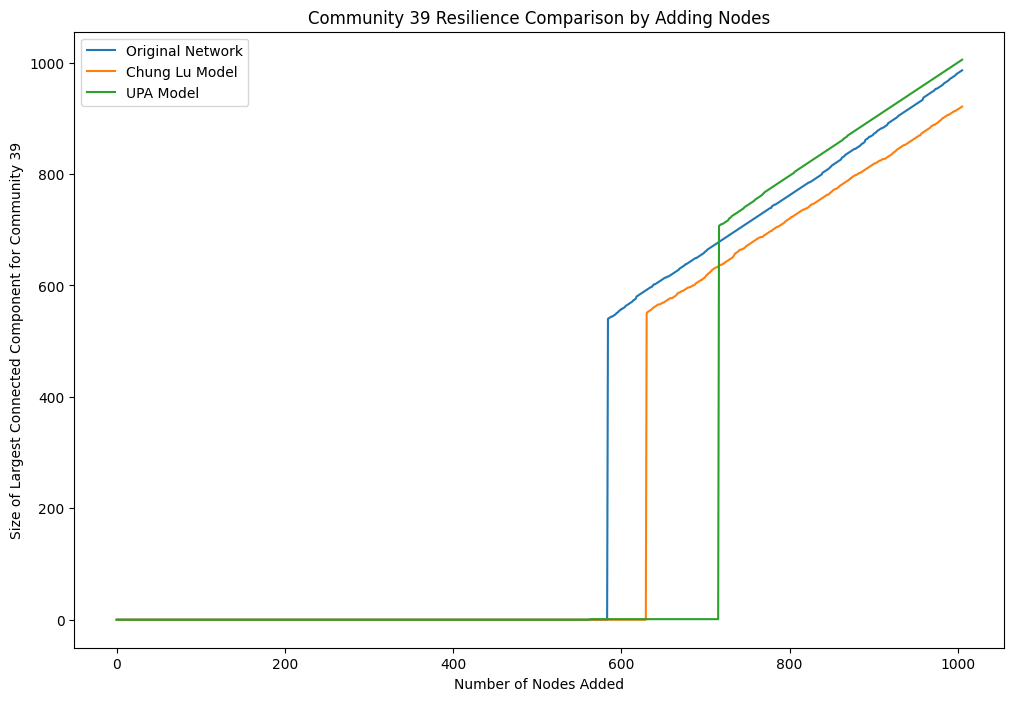

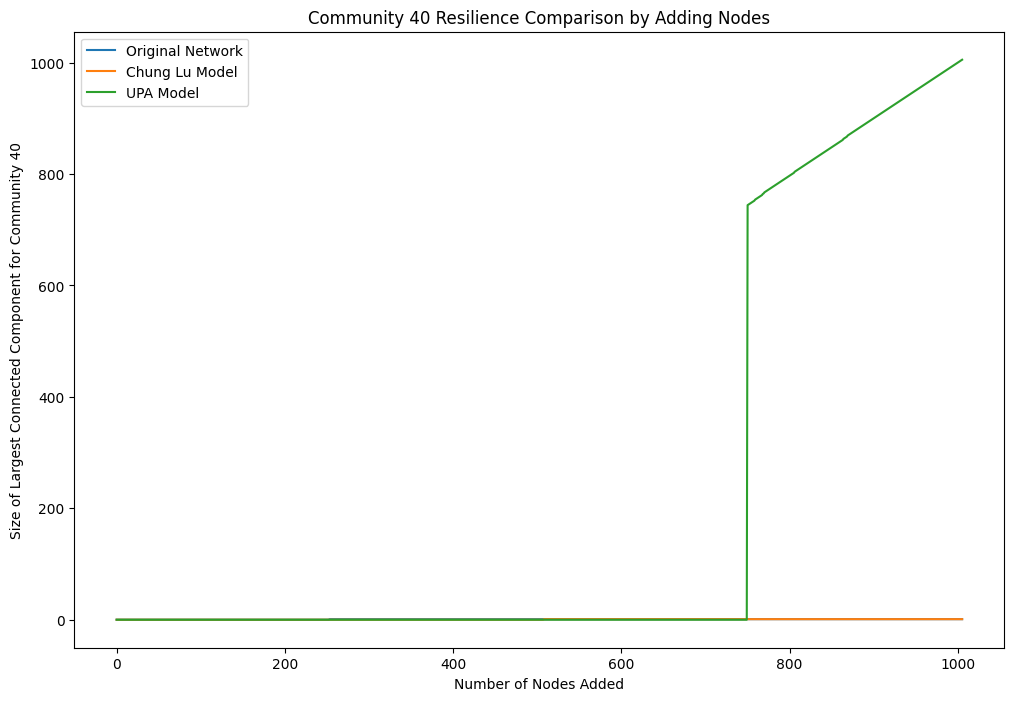

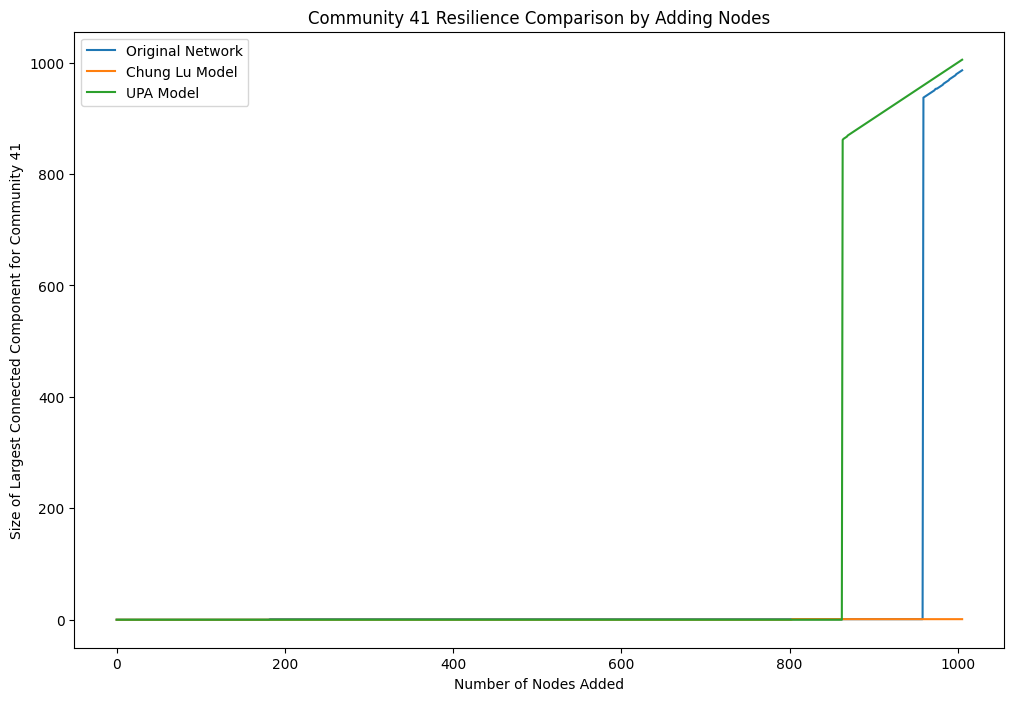

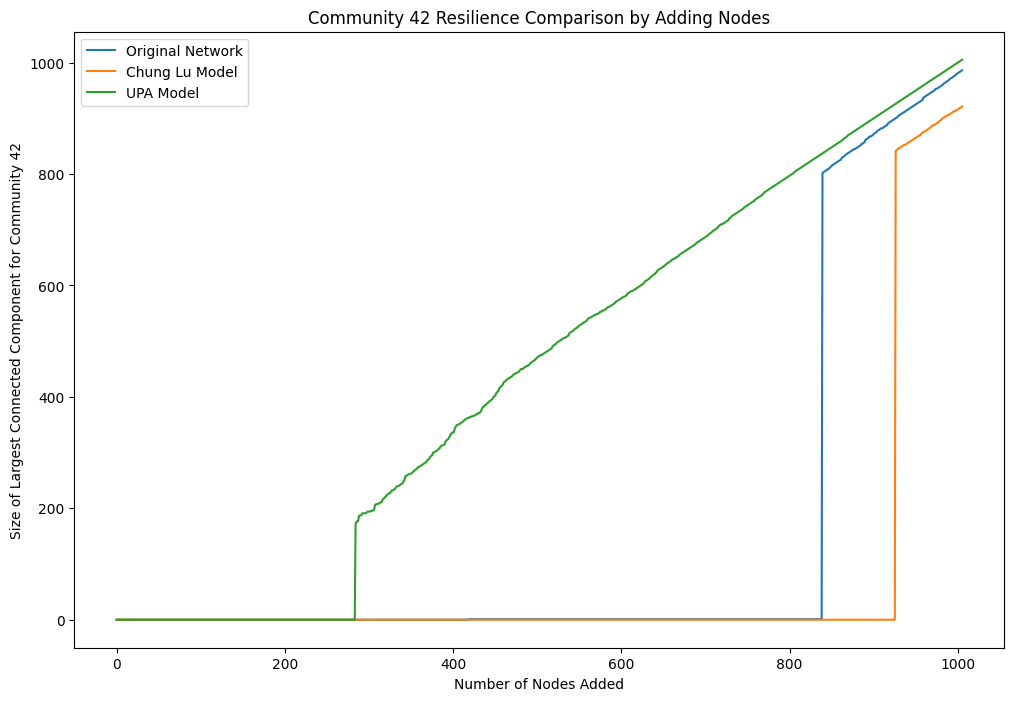

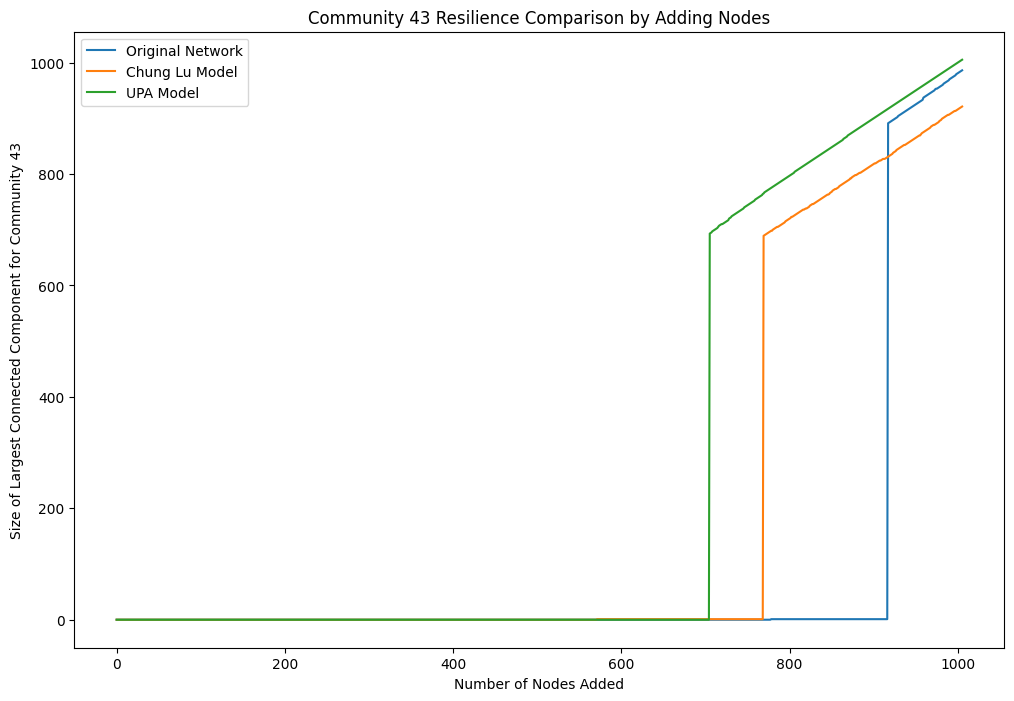

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.algorithms import community

# Load the edges data
edges_file = 'email-Eu-core.txt'
edges_df = pd.read_csv(edges_file, sep=' ', header=None, names=['node_1', 'node_2'])

# Load the labels data
labels_file = 'email-Eu-core-department-labels.txt'
labels_df = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])

# Create a graph
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Merge the labels with the graph data
nodes_data = pd.DataFrame(G.nodes(), columns=['node'])
nodes_data = nodes_data.merge(labels_df, on='node', how='left')

# Detect communities
communities = list(community.greedy_modularity_communities(G))
community_map = {}
for cid, community_nodes in enumerate(communities):
    for node in community_nodes:
        community_map[node] = cid

def compute_resilience_adding_nodes(graph, attack_order):
    resilience = [0]
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for adding nodes
def random_order(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

attack_order_original = random_order(G)

# Compute resilience by adding nodes
print("Computing resilience for the original graph by adding nodes...")
resilience_original = compute_resilience_adding_nodes(G, attack_order_original)

# Generate Chung-Lu model
def generate_chung_lu(graph):
    degree_sequence = [degree for node, degree in graph.degree()]
    W = np.array(degree_sequence)
    n = len(W)
    CL_graph = nx.Graph()
    CL_graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.rand() < (W[i] * W[j]) / (2 * sum(W)):
                CL_graph.add_edge(i, j)
    return CL_graph

chung_lu_graph = generate_chung_lu(G)
attack_order_cl = random_order(chung_lu_graph)
print("Computing resilience for the Chung Lu model by adding nodes...")
resilience_cl = compute_resilience_adding_nodes(chung_lu_graph, attack_order_cl)

# Generate UPA model
def UPA_graph(n, m):
    return nx.powerlaw_cluster_graph(n, m, 0.0)

upa_graph = UPA_graph(G.number_of_nodes(), 3)
attack_order_upa = random_order(upa_graph)
print("Computing resilience for the UPA model by adding nodes...")
resilience_upa = compute_resilience_adding_nodes(upa_graph, attack_order_upa)

# Community resilience
def compute_community_resilience(graph, attack_order, communities):
    community_resilience = {cid: [0] for cid in communities}
    total = len(attack_order)
    added_graph = nx.Graph()
    
    for i, node in enumerate(attack_order):
        added_graph.add_node(node)
        for neighbor in graph.neighbors(node):
            if added_graph.has_node(neighbor):
                added_graph.add_edge(node, neighbor)
        remaining_components = list(nx.connected_components(added_graph))
        community_sizes = {cid: 0 for cid in communities}
        for component in remaining_components:
            for cid in communities:
                if any(node in communities[cid] for node in component):
                    community_sizes[cid] = max(community_sizes[cid], len(component))
        for cid in communities:
            community_resilience[cid].append(community_sizes[cid])
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return community_resilience

# Community mapping
communities_dict = {i: list(c) for i, c in enumerate(communities)}

community_resilience_original = compute_community_resilience(G, attack_order_original, communities_dict)
community_resilience_cl = compute_community_resilience(chung_lu_graph, attack_order_cl, communities_dict)
community_resilience_upa = compute_community_resilience(upa_graph, attack_order_upa, communities_dict)

# Plot community resilience
for cid in communities_dict:
    plt.figure(figsize=(12, 8))
    plt.plot(community_resilience_original[cid], label='Original Network')
    plt.plot(community_resilience_cl[cid], label='Chung Lu Model')
    plt.plot(community_resilience_upa[cid], label='UPA Model')
    plt.xlabel('Number of Nodes Added')
    plt.ylabel(f'Size of Largest Connected Component for Community {cid}')
    plt.title(f'Community {cid} Resilience Comparison by Adding Nodes')
    plt.legend()
    plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import networkx as nx

# Extract features
features = pd.DataFrame({
    'degree': [d for n, d in G.degree()],
    'department': nodes_data['department']
})

# Feature scaling
X = features[['degree']]
y = features['department']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # Utilize all cores
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.14      0.12      0.13        16
           1       0.08      0.06      0.07        18
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         9
           4       0.09      0.21      0.13        28
           5       0.00      0.00      0.00         6
           6       0.09      0.17      0.12         6
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00         0
          13       0.08      0.14      0.11         7
          14       0.13      0.18      0.15        28
          15       0.13      0.12      0.13        16
          16       0.12      0.14      0.13         7
          17       0.00    

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Extract features
features = pd.DataFrame({
    'degree': [d for n, d in G.degree()],
    'clustering': [nx.clustering(G, n) for n in G.nodes()],
    'betweenness': [nx.betweenness_centrality(G, k=10)[n] for n in G.nodes()],
    'department': nodes_data['department']
})

# Feature scaling
X = features[['degree', 'clustering', 'betweenness']]
y = features['department']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling and SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         9
           4       0.09      0.93      0.17        28
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        16
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00        10
          18       0.00    

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

Computing resilience for the graph by removing nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000


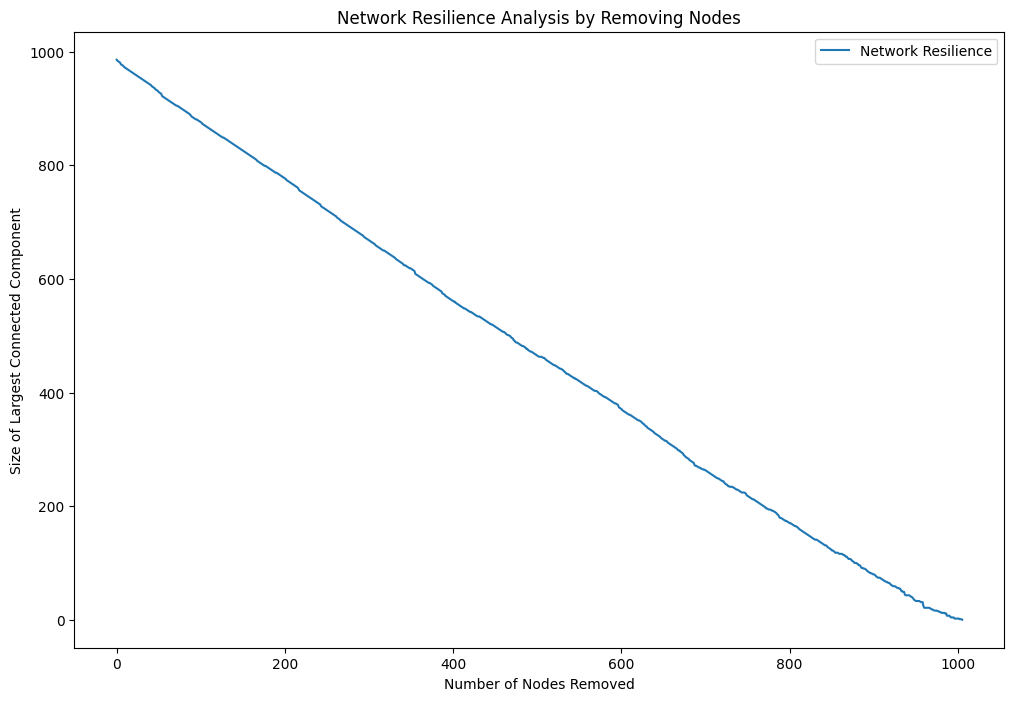

In [20]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Load the edges data
edges_file = 'email-Eu-core.txt'
edges_df = pd.read_csv(edges_file, sep=' ', header=None, names=['node_1', 'node_2'])

# Load the labels data
labels_file = 'email-Eu-core-department-labels.txt'
labels_df = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])

# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Function to generate a random order of nodes for removing from the graph
def random_order(graph):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

# Function to compute resilience as nodes are removed
def compute_resilience_removing_nodes(graph, attack_order):
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    for i, node in enumerate(attack_order):
        graph.remove_node(node)
        remaining_components = list(nx.connected_components(graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate a random order for removing nodes
attack_order = random_order(G.copy())

# Compute resilience by removing nodes
print("Computing resilience for the graph by removing nodes...")
resilience = compute_resilience_removing_nodes(G.copy(), attack_order)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience, label='Network Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Network Resilience Analysis by Removing Nodes')
plt.legend()
plt.show()


Computing resilience for the original graph by removing nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the Chung Lu model by removing nodes...
Progress: 10.0% - Nodes processed: 100
Progress: 19.9% - Nodes processed: 200
Progress: 29.9% - Nodes processed: 300
Progress: 39.8% - Nodes processed: 400
Progress: 49.8% - Nodes processed: 500
Progress: 59.7% - Nodes processed: 600
Progress: 69.7% - Nodes processed: 700
Progress: 79.6% - Nodes processed: 800
Progress: 89.6% - Nodes processed: 900
Progress: 99.5% - Nodes processed: 1000
Computing resilience for the UPA model by removing nodes...
Progress: 10.0% - Nodes proc

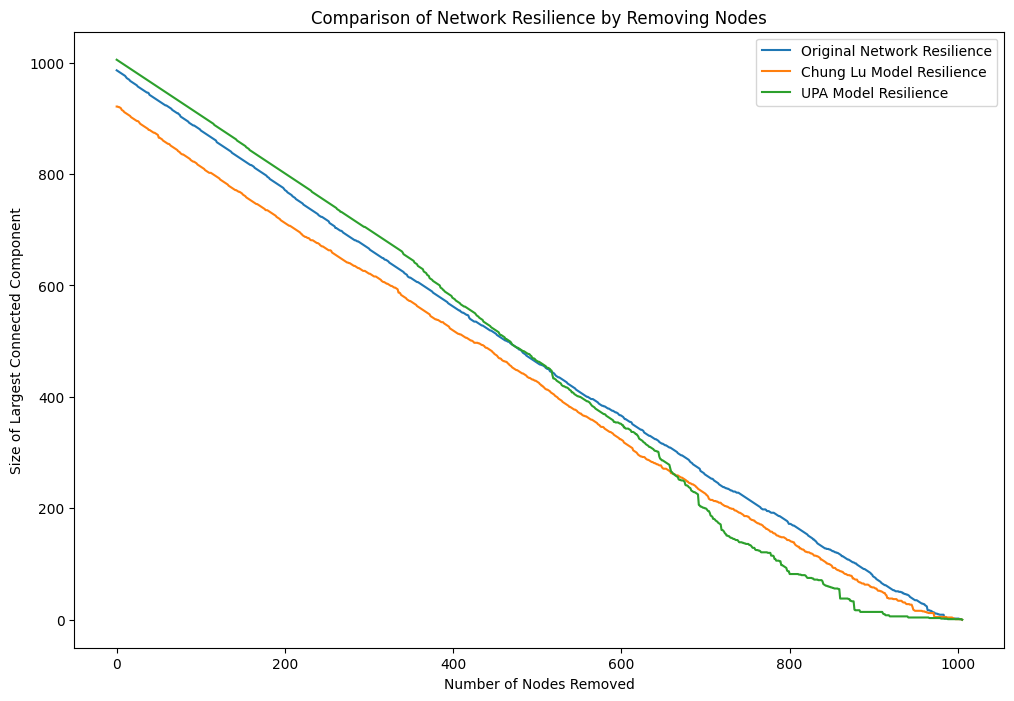

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute resilience by removing nodes
def compute_resilience_removing_nodes(graph, attack_order):
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    for i, node in enumerate(attack_order):
        graph.remove_node(node)
        remaining_components = list(nx.connected_components(graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes processed: {i + 1}")
    return resilience

# Generate attack orders for all models
attack_order_original = random_order(G.copy())
attack_order_cl = random_order(chung_lu_graph.copy())
attack_order_upa = random_order(upa_graph.copy())

# Compute resilience by removing nodes for each model
print("Computing resilience for the original graph by removing nodes...")
resilience_original = compute_resilience_removing_nodes(G.copy(), attack_order_original)
print("Computing resilience for the Chung Lu model by removing nodes...")
resilience_cl = compute_resilience_removing_nodes(chung_lu_graph.copy(), attack_order_cl)
print("Computing resilience for the UPA model by removing nodes...")
resilience_upa = compute_resilience_removing_nodes(upa_graph.copy(), attack_order_upa)

# Plotting the resilience comparison
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Removing Nodes')
plt.legend()
plt.show()


In [22]:
import pandas as pd
import networkx as nx
import community as community_louvain

# Load the data for the Email dataset
email_edges_file = 'email-Eu-core.txt'
email_labels_file = 'email-Eu-core-department-labels.txt'
email_edges_df = pd.read_csv(email_edges_file, sep=' ', header=None, names=['node_1', 'node_2'])
email_labels_df = pd.read_csv(email_labels_file, sep=' ', header=None, names=['node', 'department'])

# Create the Email graph
email_G = nx.Graph()
for _, row in email_edges_df.iterrows():
    email_G.add_edge(row['node_1'], row['node_2'])

# Apply the Louvain method to the Email dataset
email_partition = community_louvain.best_partition(email_G)
email_modularity = community_louvain.modularity(email_partition, email_G)
print(f"Email dataset modularity: {email_modularity}")


Email dataset modularity: 0.4283224219836758


In [23]:
import matplotlib.pyplot as plt

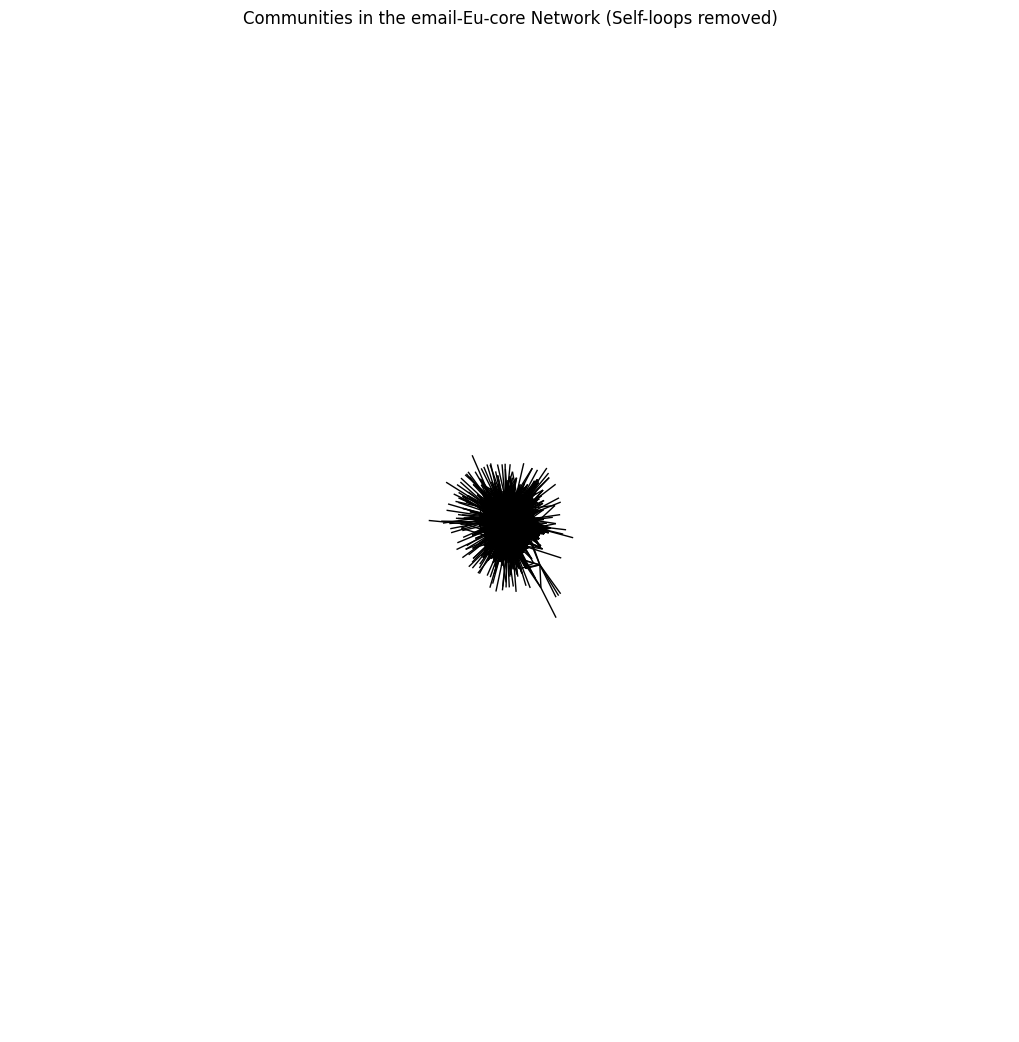

In [24]:
import networkx as nx

# Load the email network dataset
email_network = nx.read_edgelist('email-Eu-core.txt', create_using=nx.Graph(), nodetype=int)

# Remove self-loops
email_network.remove_edges_from(nx.selfloop_edges(email_network))

# Verify self-loops are removed
assert not any(email_network.has_edge(node, node) for node in email_network.nodes)

# Visualize the cleaned network
pos = nx.spring_layout(email_network)
plt.figure(figsize=(10, 10))
nx.draw(email_network, pos, node_color=list(nx.get_node_attributes(email_network, 'community').values()), with_labels=False, node_size=50)
plt.title("Communities in the email-Eu-core Network (Self-loops removed)")
plt.show()


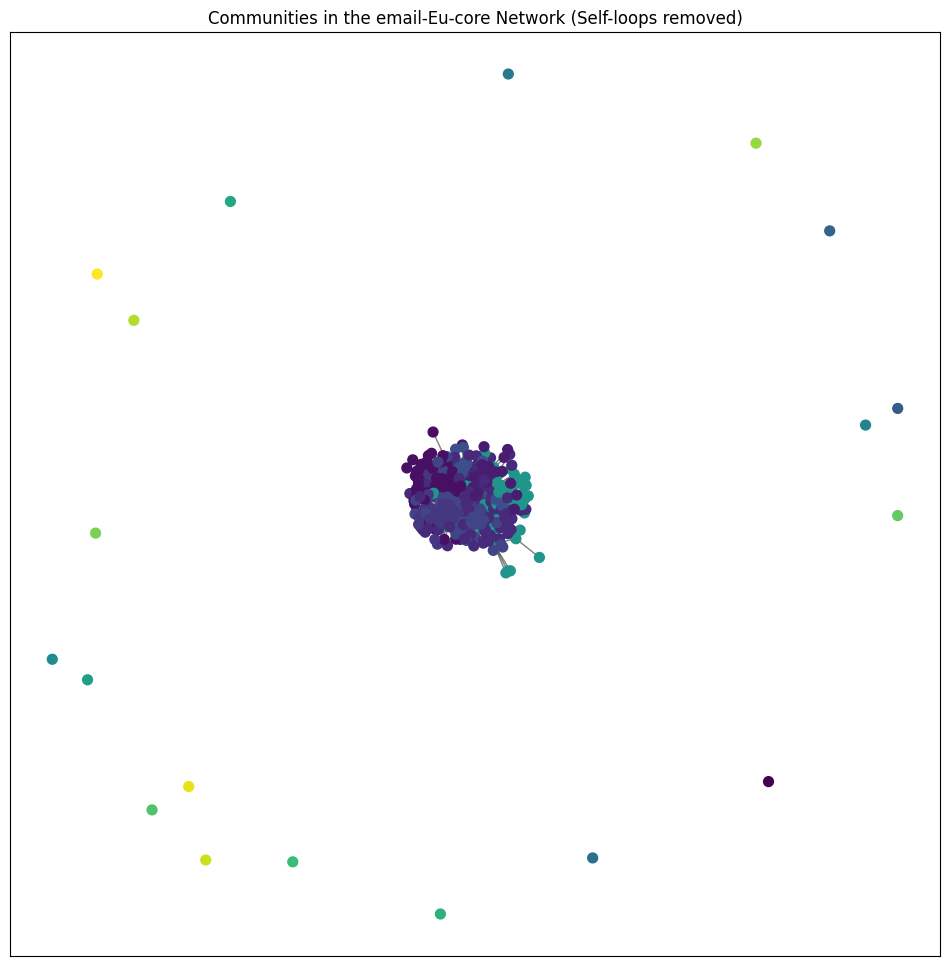

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Load the Email network data
email_network = nx.read_edgelist('email-Eu-core.txt', create_using=nx.Graph(), nodetype=int)

# Remove self-loops
email_network.remove_edges_from(nx.selfloop_edges(email_network))

# Detect communities
partition = community_louvain.best_partition(email_network)

# Draw the network with communities
pos = nx.spring_layout(email_network)
cmap = plt.get_cmap('viridis')

plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(email_network, pos, alpha=0.5)
nx.draw_networkx_nodes(email_network, pos, node_size=50, cmap=cmap, 
                       node_color=list(partition.values()))

plt.title("Communities in the email-Eu-core Network (Self-loops removed)")
plt.show()


/var/folders/ng/mym24qcx4s1g78pc10x2w6sh0000gn/T/ipykernel_18173/1997173499.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edges_email = pd.read_csv('email-Eu-core.txt', delim_whitespace=True, names=['source', 'target'])


Size of the largest connected component after adding edges: 993


/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


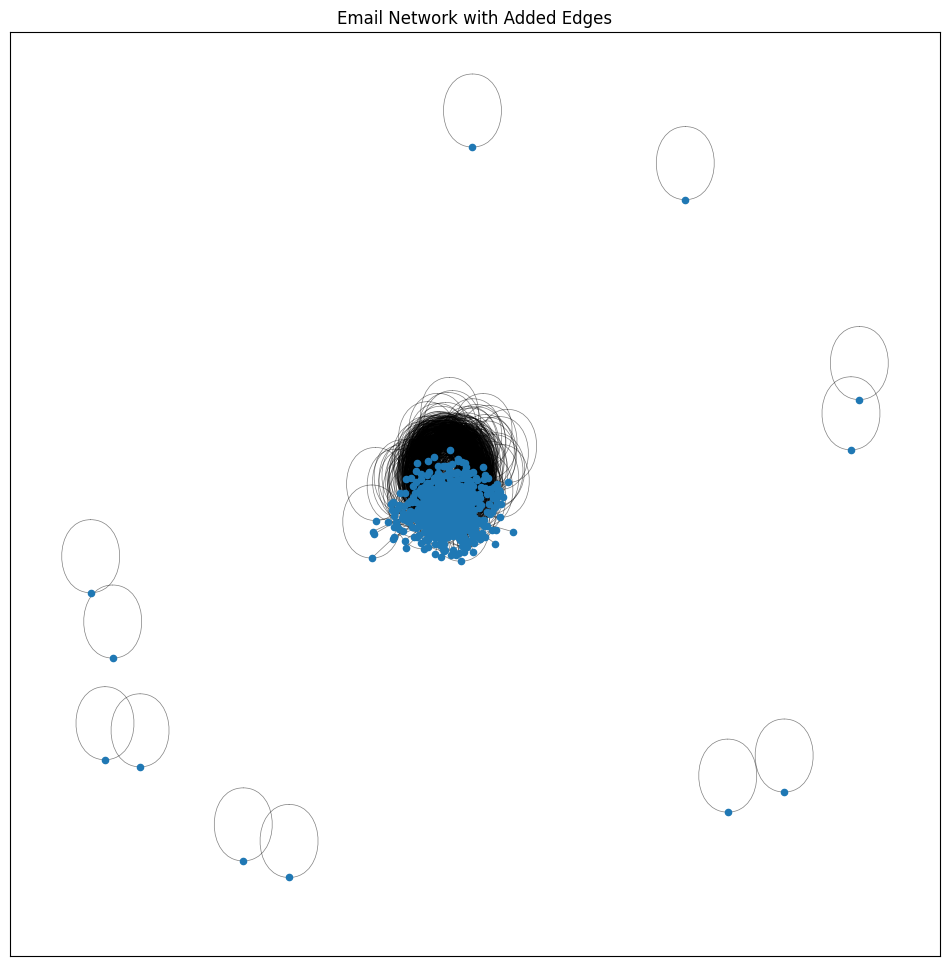

In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the Email dataset
edges_email = pd.read_csv('email-Eu-core.txt', delim_whitespace=True, names=['source', 'target'])

# Create the graph
G_email = nx.from_pandas_edgelist(edges_email, source='source', target='target')

# Function to add random edges
def add_random_edges(G, num_edges):
    added_edges = []
    nodes = list(G.nodes())
    while len(added_edges) < num_edges:
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
            added_edges.append((u, v))
    return added_edges

# Add edges and evaluate resilience
num_edges_to_add = 100  # Adjust the number as needed
added_edges = add_random_edges(G_email, num_edges_to_add)

# Compute the size of the largest connected component
largest_cc_size = len(max(nx.connected_components(G_email), key=len))
print(f"Size of the largest connected component after adding edges: {largest_cc_size}")

# Visualization
pos = nx.spring_layout(G_email, seed=42)  # Fixed seed for reproducibility
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G_email, pos, alpha=0.5, edge_color='k', width=0.5)
nx.draw_networkx_nodes(G_email, pos, node_size=20, cmap=plt.cm.jet)
plt.title('Email Network with Added Edges')
plt.show()


Computing resilience for the original graph by removing nodes...
Progress: 10.0% - Nodes removed: 100
Progress: 19.9% - Nodes removed: 200
Progress: 29.9% - Nodes removed: 300
Progress: 39.8% - Nodes removed: 400
Progress: 49.8% - Nodes removed: 500
Progress: 59.7% - Nodes removed: 600
Progress: 69.7% - Nodes removed: 700
Progress: 79.6% - Nodes removed: 800
Progress: 89.6% - Nodes removed: 900
Progress: 99.5% - Nodes removed: 1000
Computing resilience for the Chung Lu model by removing nodes...
Progress: 9.9% - Nodes removed: 96
Progress: 19.8% - Nodes removed: 192
Progress: 29.8% - Nodes removed: 288
Progress: 39.7% - Nodes removed: 384
Progress: 49.6% - Nodes removed: 480
Progress: 59.5% - Nodes removed: 576
Progress: 69.4% - Nodes removed: 672
Progress: 79.3% - Nodes removed: 768
Progress: 89.3% - Nodes removed: 864
Progress: 99.2% - Nodes removed: 960
Computing resilience for the UPA model by removing nodes...
Progress: 10.0% - Nodes removed: 100
Progress: 19.9% - Nodes removed: 2

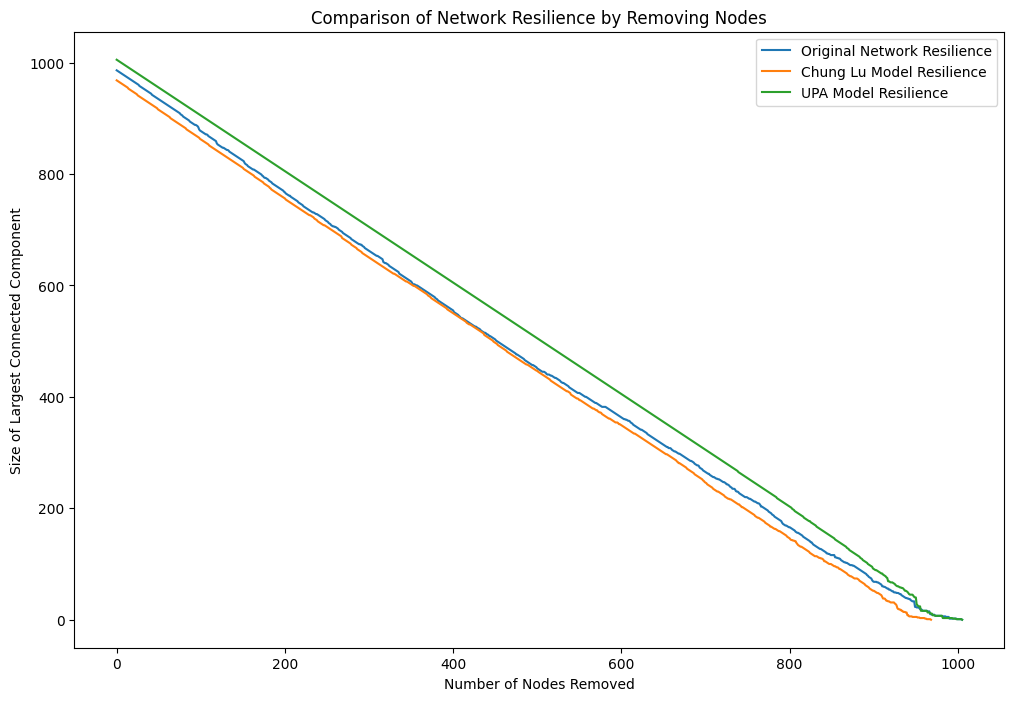

In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the Email dataset
edges_email = pd.read_csv('email-Eu-core.txt', sep=' ', header=None, names=['source', 'target'])
G_email = nx.from_pandas_edgelist(edges_email, source='source', target='target')

# Generate Chung Lu model
degree_sequence = [d for n, d in G_email.degree()]
chung_lu_graph = nx.expected_degree_graph(degree_sequence, selfloops=False)

# Generate UPA model
m = int(sum(degree_sequence) / len(degree_sequence)) // 2  # Average degree
upa_graph = nx.complete_graph(m)
while len(upa_graph) < len(G_email):
    new_node = len(upa_graph)
    targets = random.choices(list(upa_graph.nodes()), k=m)
    upa_graph.add_node(new_node)
    upa_graph.add_edges_from((new_node, t) for t in targets)

# Ensure same number of nodes
assert len(chung_lu_graph) == len(G_email)
assert len(upa_graph) == len(G_email)

# Remove isolated nodes from Chung Lu and UPA models
chung_lu_graph.remove_nodes_from(list(nx.isolates(chung_lu_graph)))
upa_graph.remove_nodes_from(list(nx.isolates(upa_graph)))

def random_order(graph):
    """
    Generate a random order of nodes for removal.
    """
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    return nodes

def compute_resilience_removing_nodes(graph, attack_order):
    """
    Compute the resilience of the graph as nodes are removed according to attack_order.
    """
    resilience = [len(max(nx.connected_components(graph), key=len, default=set()))]
    total = len(attack_order)
    
    for i, node in enumerate(attack_order):
        graph.remove_node(node)
        remaining_components = list(nx.connected_components(graph))
        if remaining_components:
            resilience.append(len(max(remaining_components, key=len)))
        else:
            resilience.append(0)
        if (i + 1) % (total // 10) == 0:
            print(f"Progress: {100 * (i + 1) / total:.1f}% - Nodes removed: {i + 1}")
    return resilience

# Generate attack orders
attack_order_original = random_order(G_email.copy())
attack_order_cl = random_order(chung_lu_graph.copy())
attack_order_upa = random_order(upa_graph.copy())

# Compute resilience by removing nodes
print("Computing resilience for the original graph by removing nodes...")
resilience_original = compute_resilience_removing_nodes(G_email.copy(), attack_order_original)
print("Computing resilience for the Chung Lu model by removing nodes...")
resilience_cl = compute_resilience_removing_nodes(chung_lu_graph.copy(), attack_order_cl)
print("Computing resilience for the UPA model by removing nodes...")
resilience_upa = compute_resilience_removing_nodes(upa_graph.copy(), attack_order_upa)

# Plotting the resilience
plt.figure(figsize=(12, 8))
plt.plot(resilience_original, label='Original Network Resilience')
plt.plot(resilience_cl, label='Chung Lu Model Resilience')
plt.plot(resilience_upa, label='UPA Model Resilience')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Comparison of Network Resilience by Removing Nodes')
plt.legend()
plt.show()


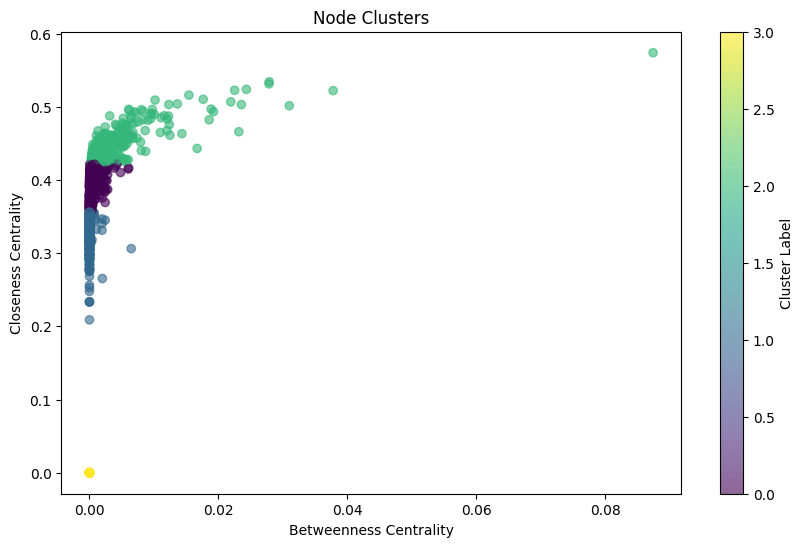

In [28]:
import networkx as nx
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Email dataset from text file
edges = pd.read_csv('email-Eu-core.txt', delimiter=' ', header=None, names=['source', 'target'])
G = nx.from_pandas_edgelist(edges, source='source', target='target')

# Calculate betweenness and closeness centrality
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame with centrality measures
features_df = pd.DataFrame({
    'betweenness': list(betweenness_centrality.values()),
    'closeness': list(closeness_centrality.values())
})

# Perform K-means clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_df)

# Add cluster labels to the DataFrame
features_df['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_df['betweenness'], features_df['closeness'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Node Clusters')
cbar = plt.colorbar()
cbar.set_label('Cluster Label')
plt.show()


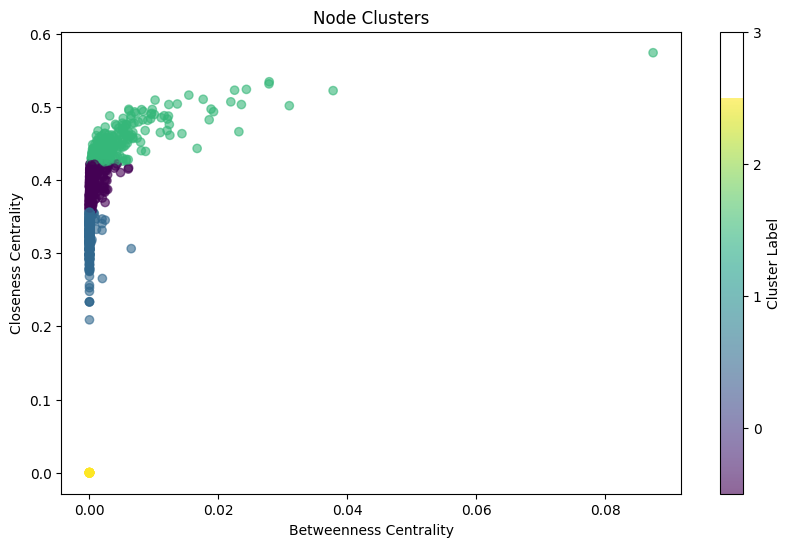

In [29]:
import networkx as nx
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Email dataset from text file
edges = pd.read_csv('email-Eu-core.txt', delimiter=' ', header=None, names=['source', 'target'])
G = nx.from_pandas_edgelist(edges, source='source', target='target')

# Calculate betweenness and closeness centrality
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame with centrality measures
features_df = pd.DataFrame({
    'betweenness': list(betweenness_centrality.values()),
    'closeness': list(closeness_centrality.values())
})

# Perform K-means clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_df)

# Add cluster labels to the DataFrame
features_df['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_df['betweenness'], features_df['closeness'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Node Clusters')

# Create a color bar with correct labels
cbar = plt.colorbar(scatter, ticks=range(num_clusters))
cbar.set_label('Cluster Label')
cbar.set_ticks([i + 0.5 for i in range(num_clusters)])
cbar.set_ticklabels(range(num_clusters))

plt.show()
